#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.isnull().sum()  # checking null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### CHECKING FOR OUTLIERS

In [5]:
column_list = df.columns

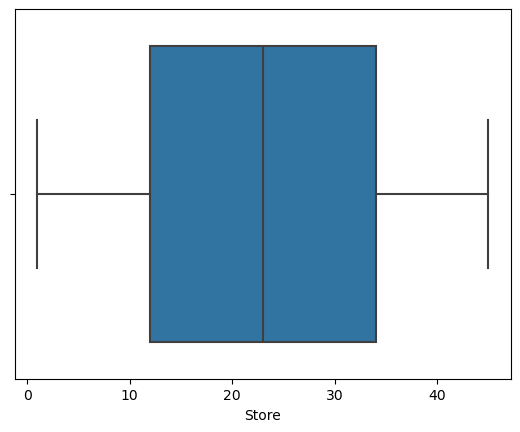

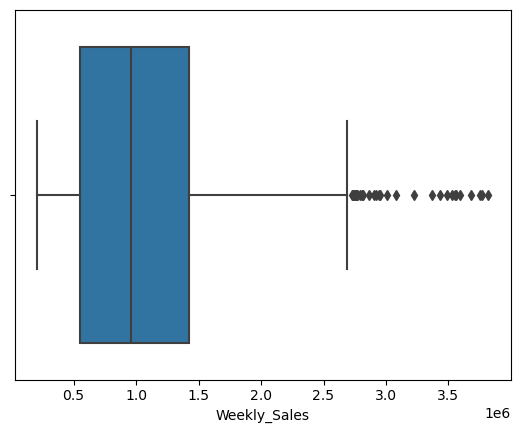

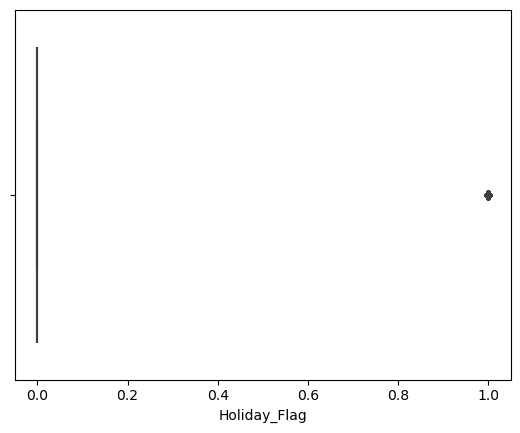

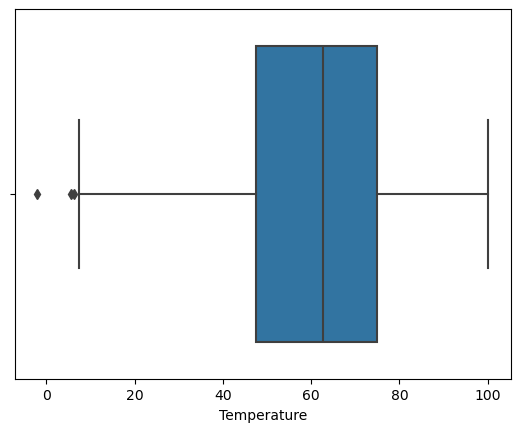

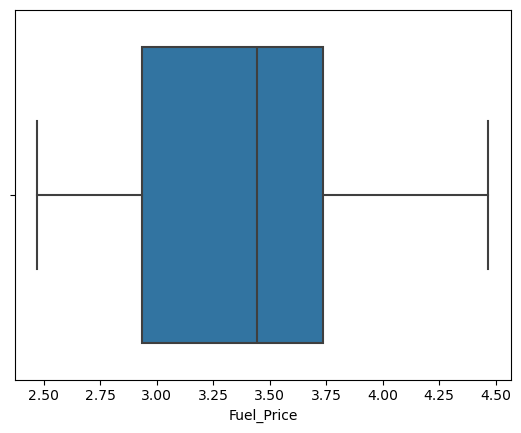

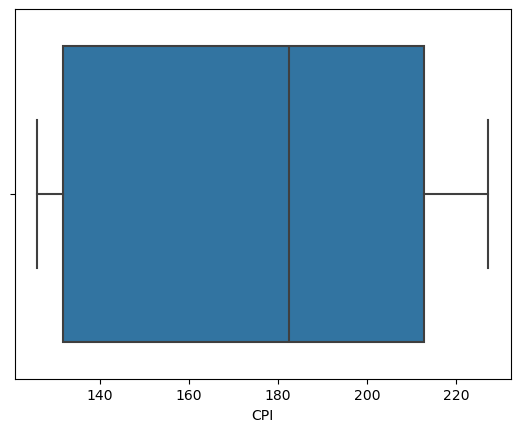

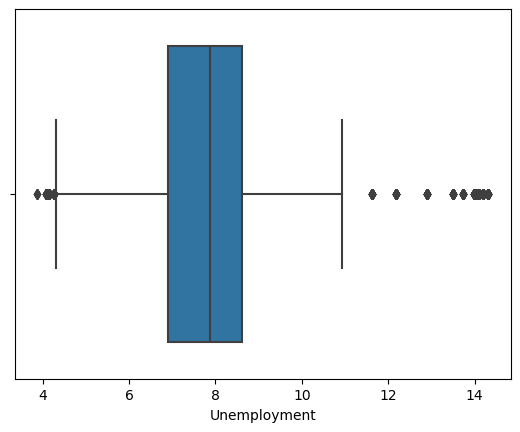

In [6]:
for i in column_list:
    if df.dtypes[i]=='int64' or df.dtypes[i]=='float64':
        sns.boxplot(x=df[i])
        plt.show()

###### From the above boxplots,it's clear that Weekly_Sales and Unemploment have outliers.

In [7]:
# Summary statistics
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='Date'>

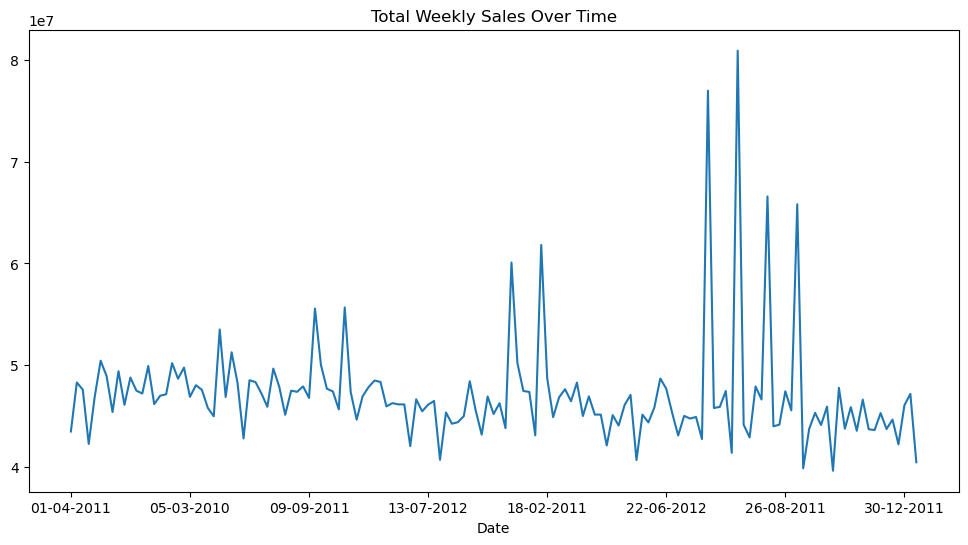

In [8]:
# Time series plot of sales
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,6), title='Total Weekly Sales Over Time')

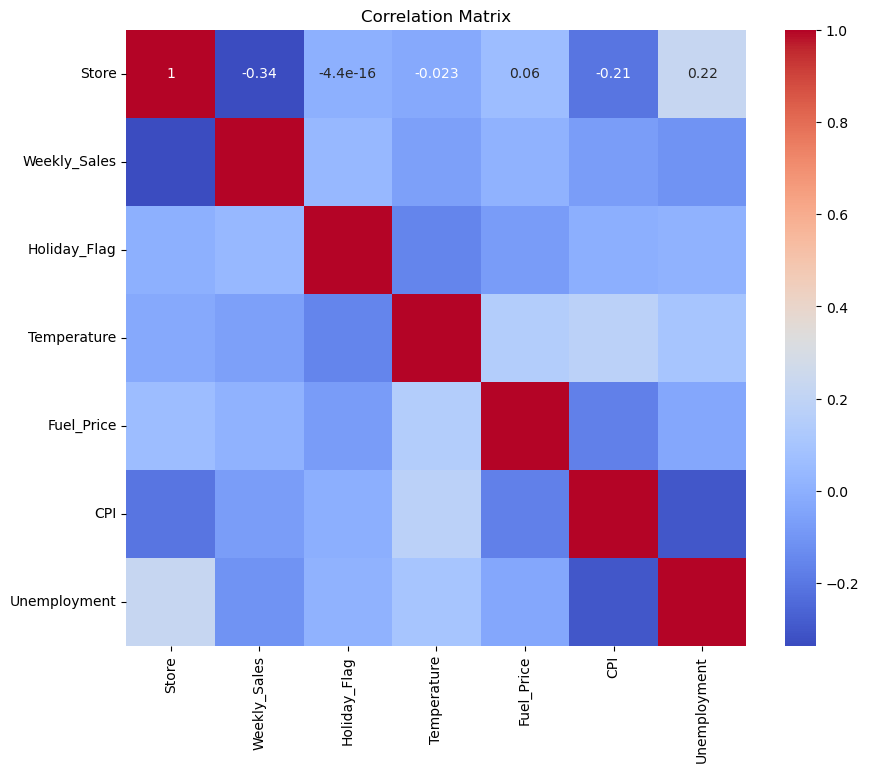

In [9]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation analysis
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


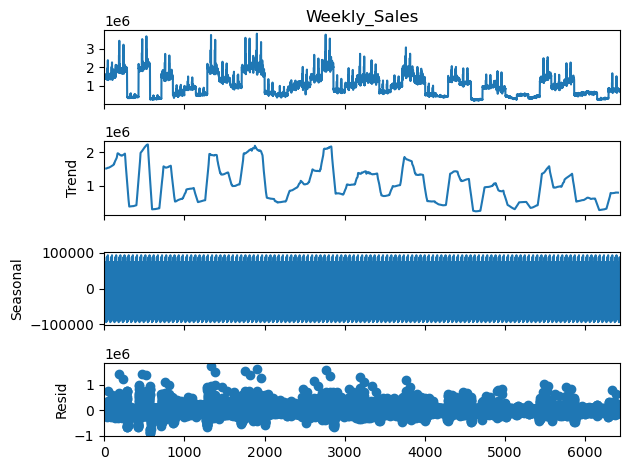

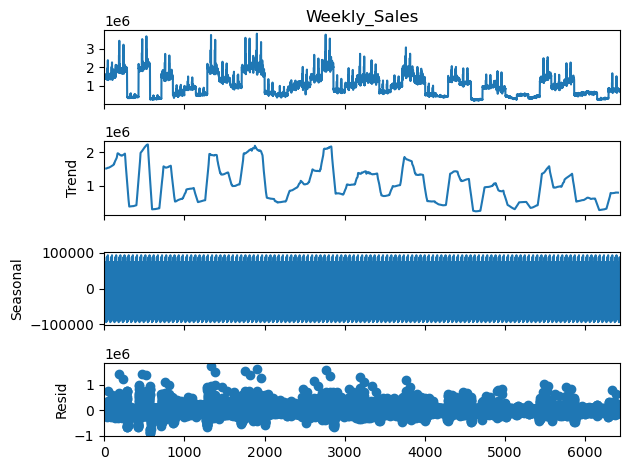

In [10]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)
decomposition.plot()


In [11]:
store_sales_unemployment = df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().unstack().iloc[:,1] # group data by store
print(store_sales_unemployment)


Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
Name: (Weekly_Sales, Unemployment), dtype: float64


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to run linear regression for each store
def linear_regression_per_store(df):
    store_impacts = []
    
    for store in df['Store'].unique():
        # Filter the data for each store
        store_data = df[df['Store'] == store]
        
        # Reshape the unemployment data for regression
        X = store_data['Unemployment'].values.reshape(-1, 1)  # Independent variable (Unemployment)
        y = store_data['Weekly_Sales'].values  # Dependent variable (Weekly Sales)
        
        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Get the slope (coefficient) and intercept
        slope = model.coef_[0]
        intercept = model.intercept_
        store_impacts.append((store, slope))
        
    # Convert to DataFrame
    store_impacts_df = pd.DataFrame(store_impacts, columns=['Store', 'Impact of Unemployment on Sales'])
    
    return store_impacts_df

# Run the regression and get the impact of unemployment on sales
impact_df = linear_regression_per_store(df)

# Display the stores where unemployment has the most negative impact on sales
worst_affected_stores = impact_df.sort_values(by='Impact of Unemployment on Sales').head()
print(worst_affected_stores)


    Store  Impact of Unemployment on Sales
40     41                   -166181.375633
38     39                   -119050.372488
16     17                    -90832.279462
19     20                    -86225.540313
3       4                    -63122.487555


In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [101]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [102]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce') #setting "Date" to datetime format


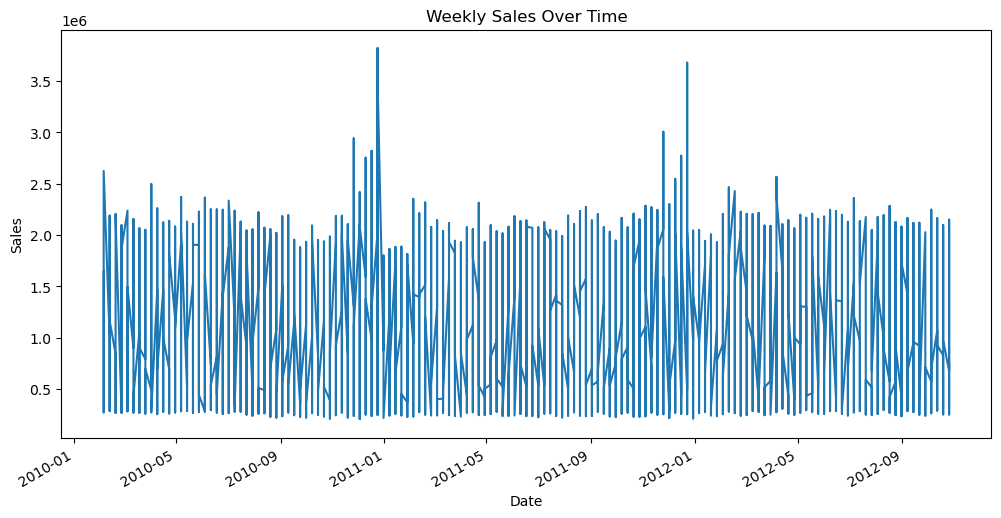

In [104]:
df.set_index('Date', inplace=True)  # Set the date column as the index
df['Weekly_Sales'].plot(figsize=(12,6), title='Weekly Sales Over Time', xlabel='Date', ylabel='Sales')
plt.show()

## temperature affect the weekly sales

In [14]:
correlation = df[['Temperature','Weekly_Sales']].corr()  
print(correlation)

              Temperature  Weekly_Sales
Temperature       1.00000      -0.06381
Weekly_Sales     -0.06381       1.00000


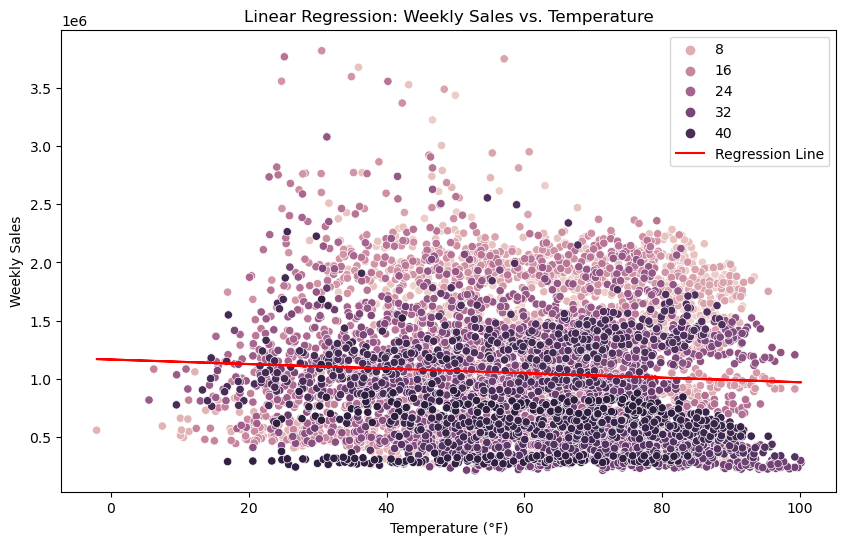

R-squared: 0.004071717781964135
Coefficient (slope): -1952.4192272081987
Intercept: 1165406.012792378


In [16]:
from sklearn.linear_model import LinearRegression

# Reshape the data
X = df['Temperature'].values.reshape(-1, 1)
y = df['Weekly_Sales'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, hue='Store')
plt.plot(df['Temperature'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Weekly Sales vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Get the R-squared value and coefficients
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


#### Consumer Price index affecting the weekly sales of various stores

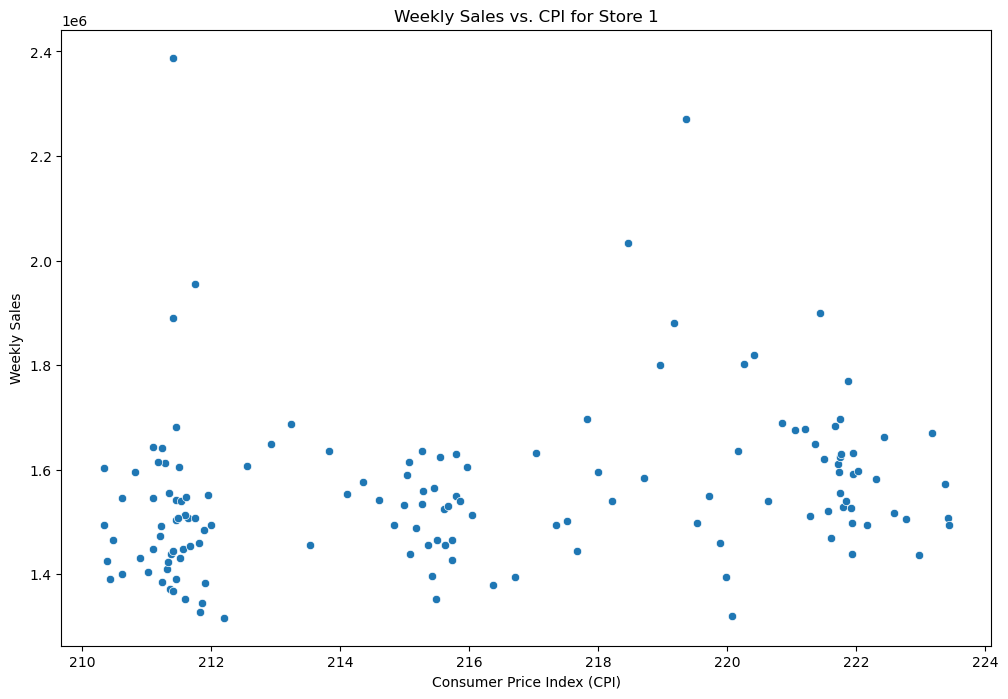

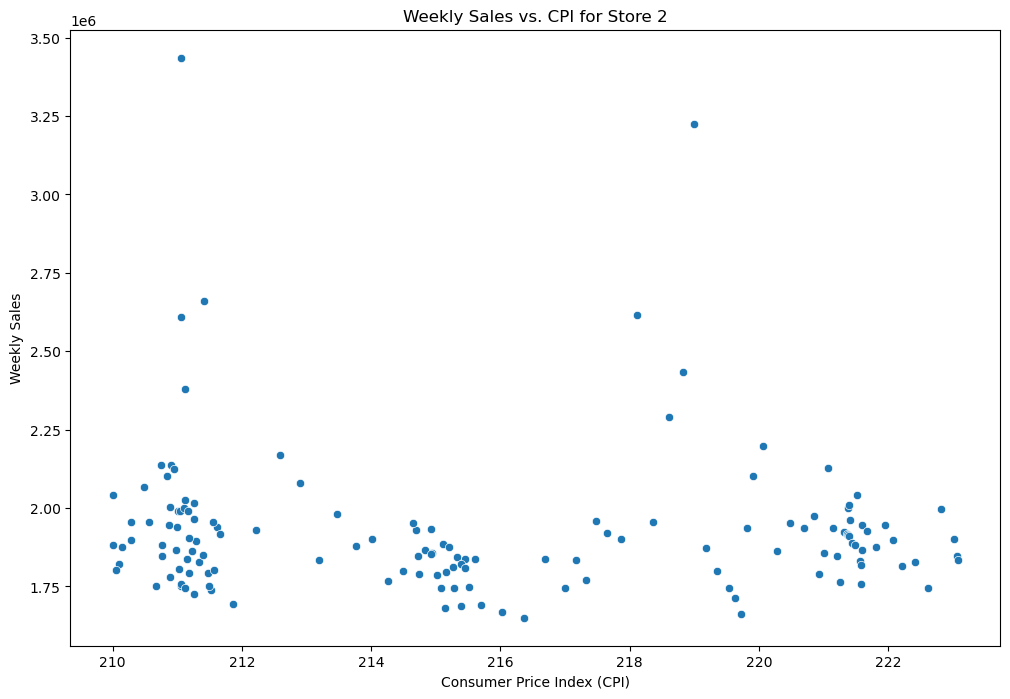

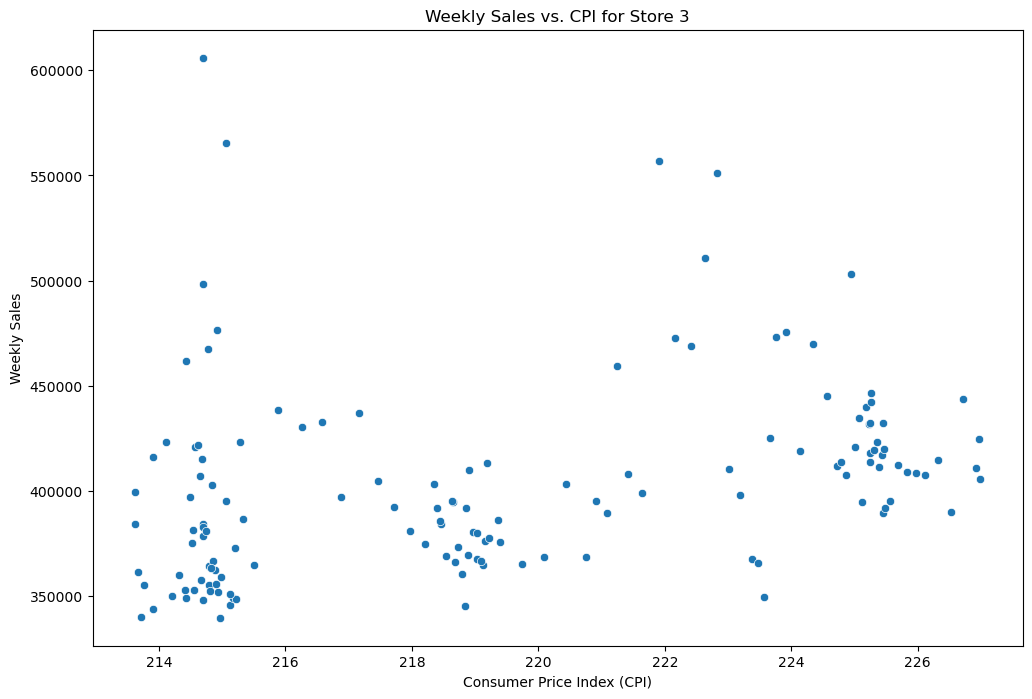

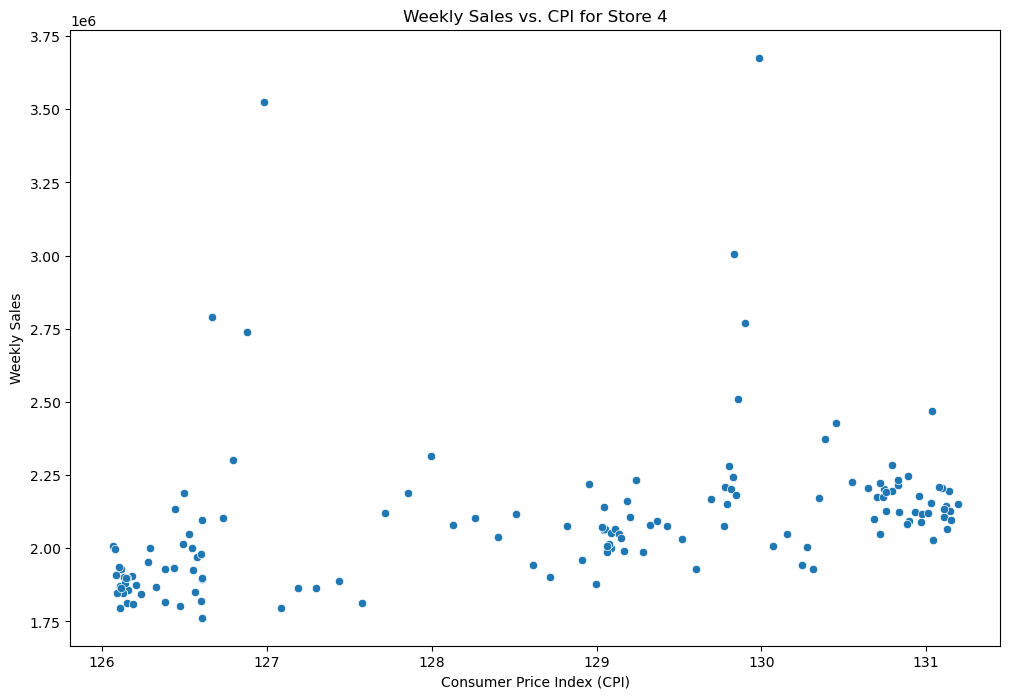

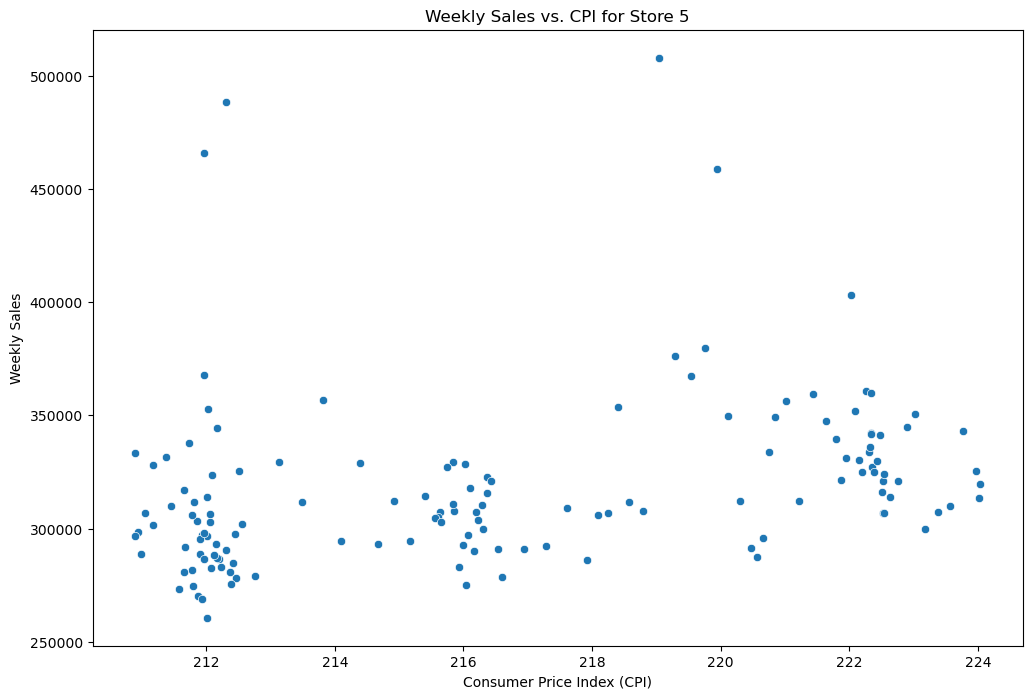

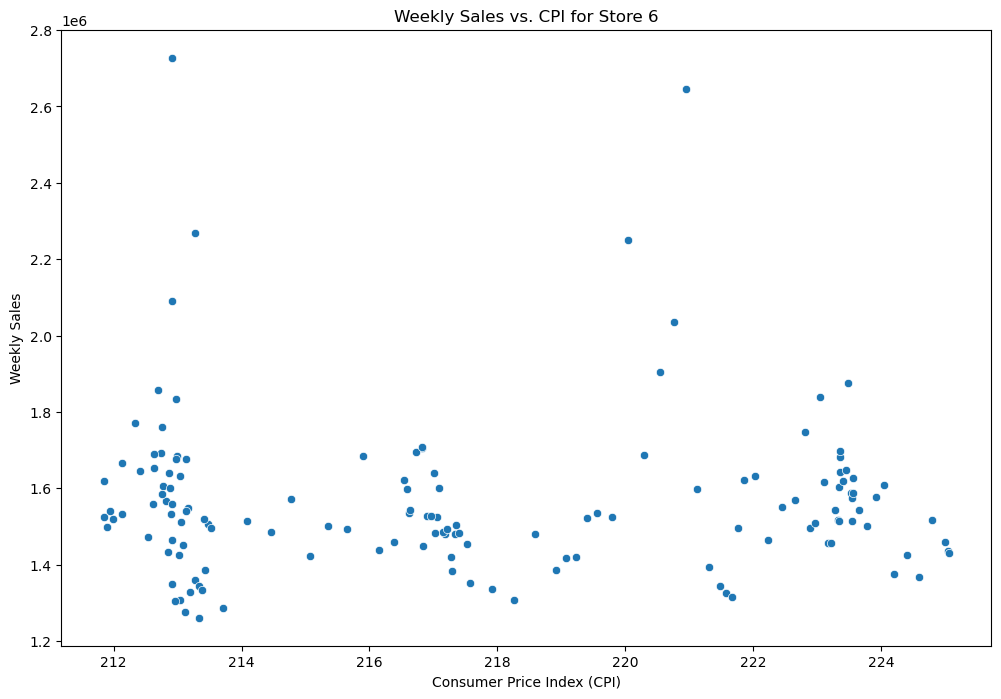

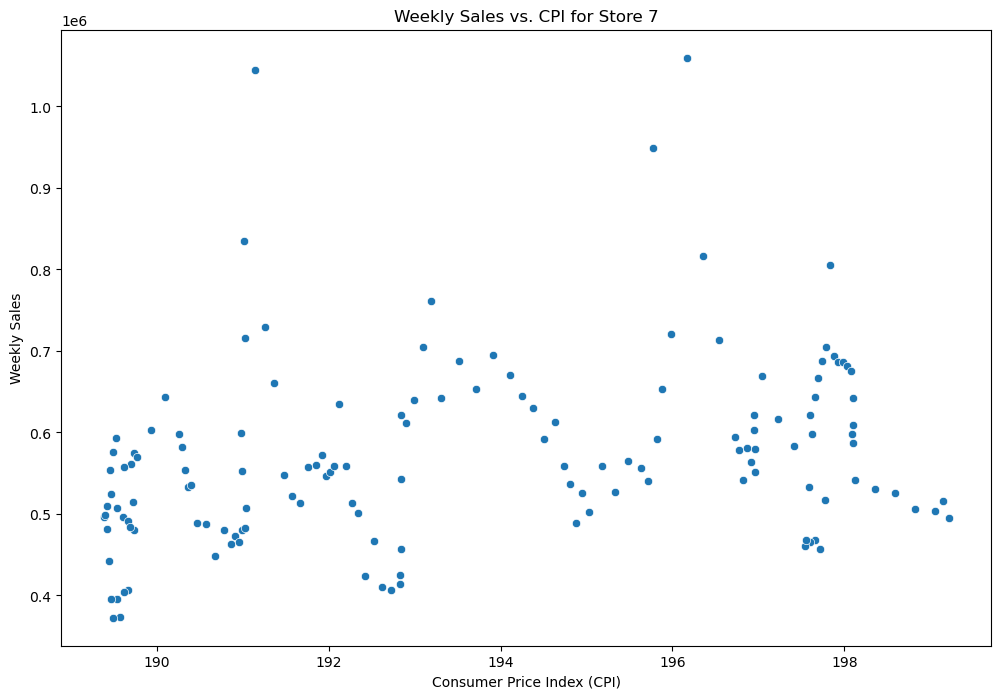

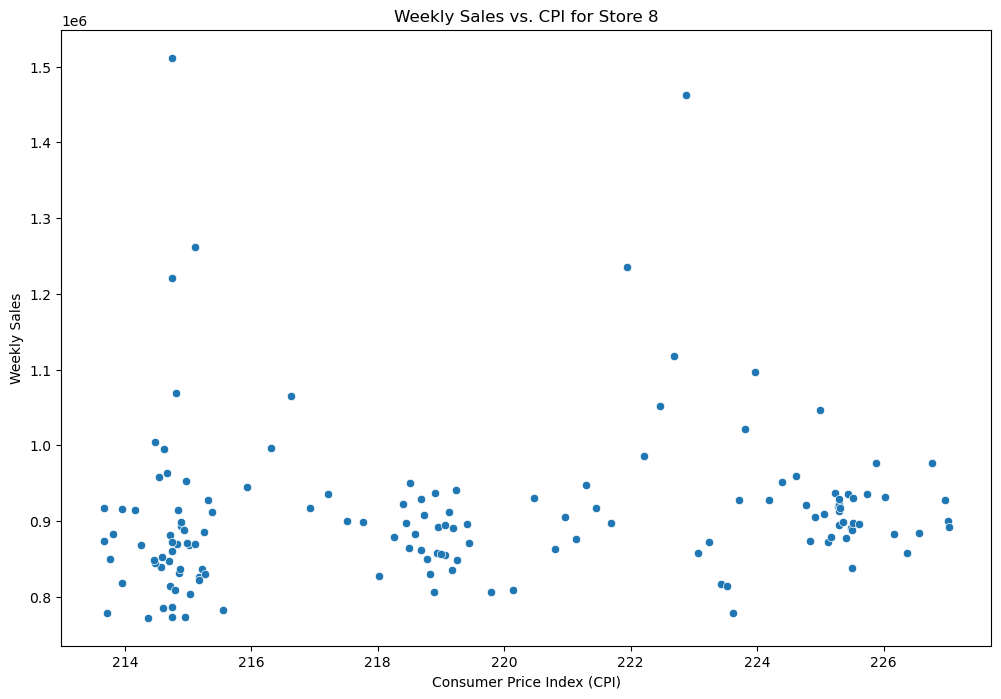

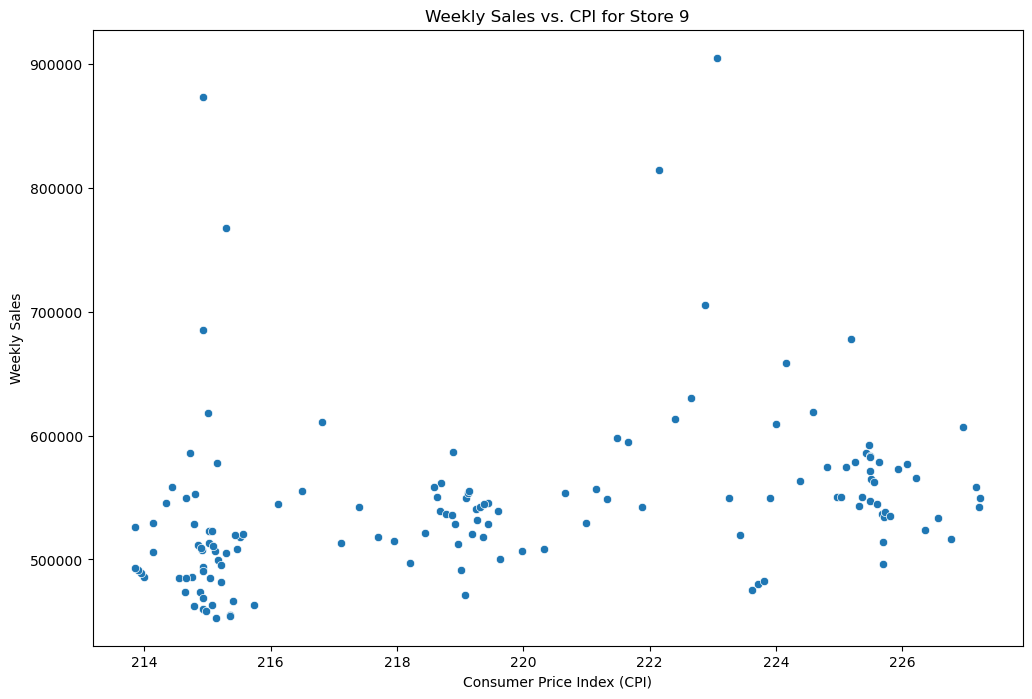

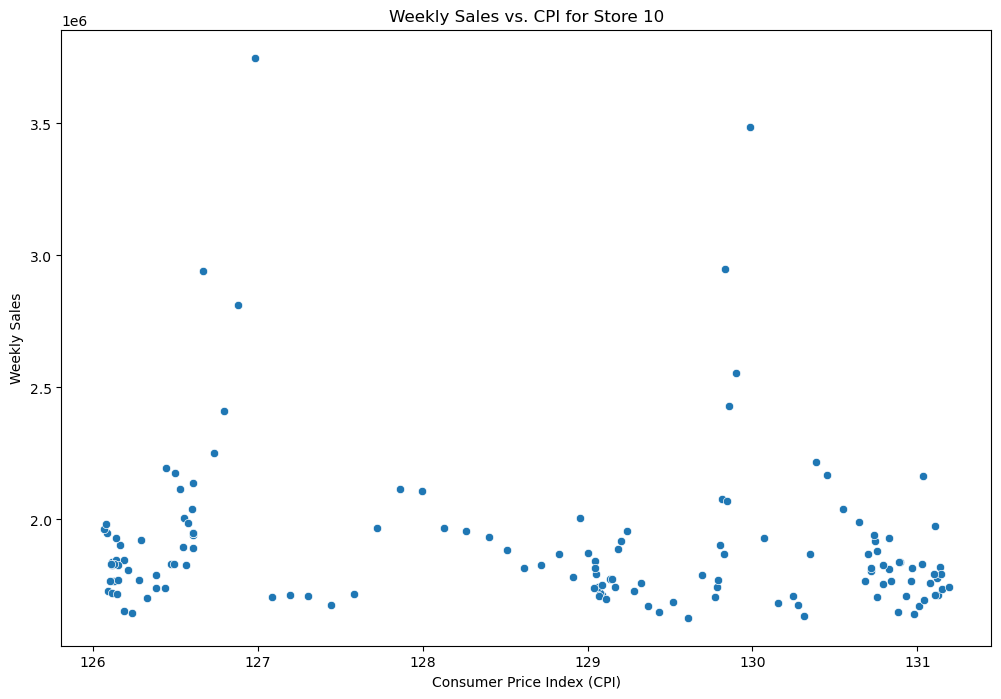

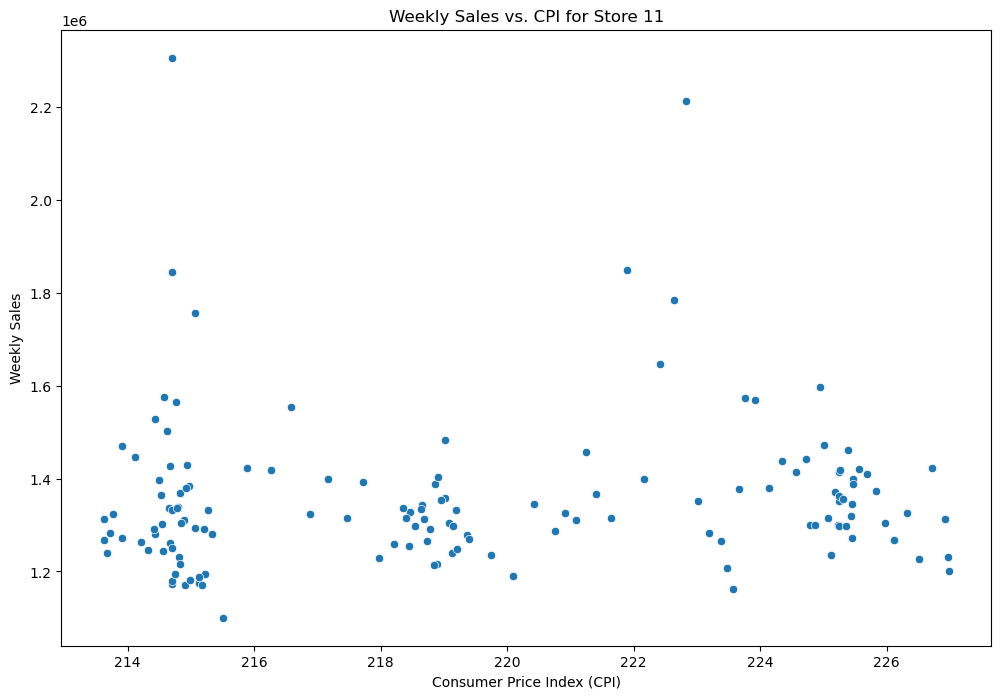

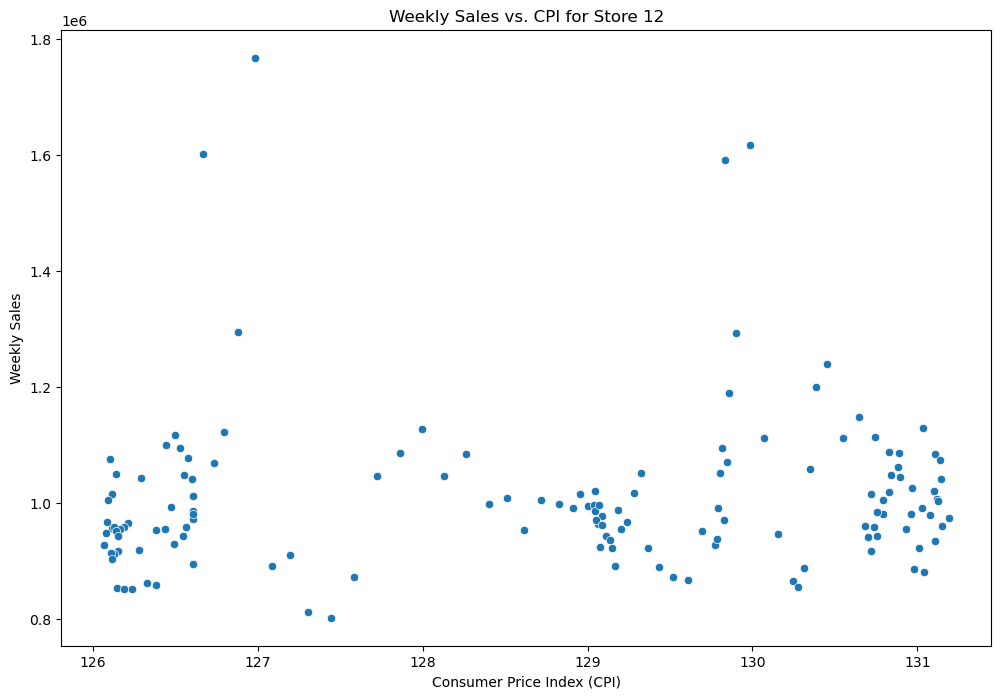

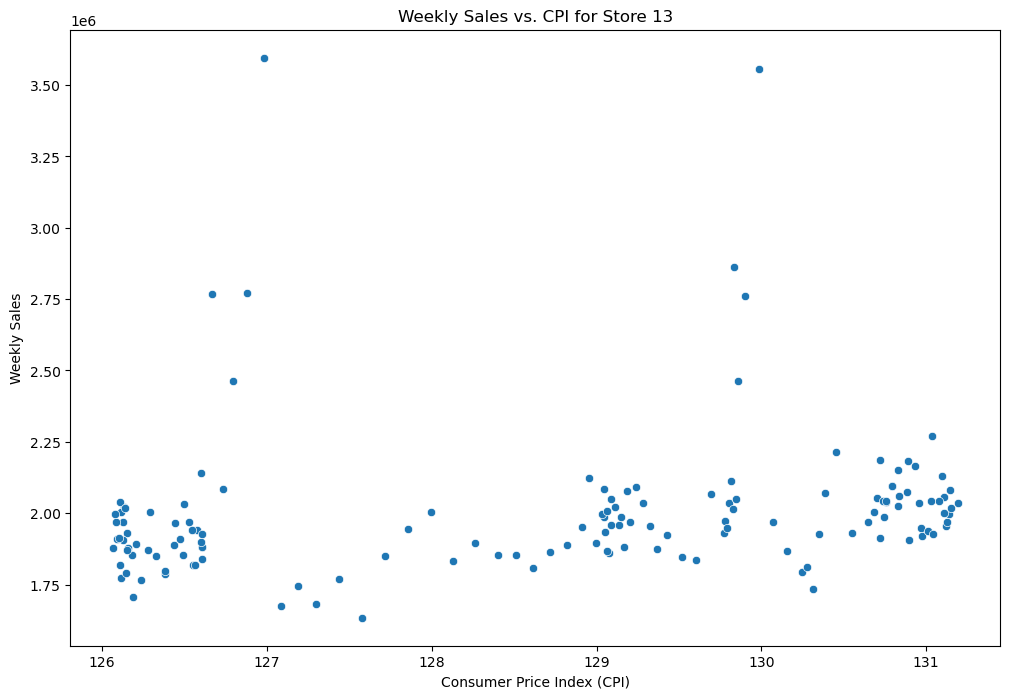

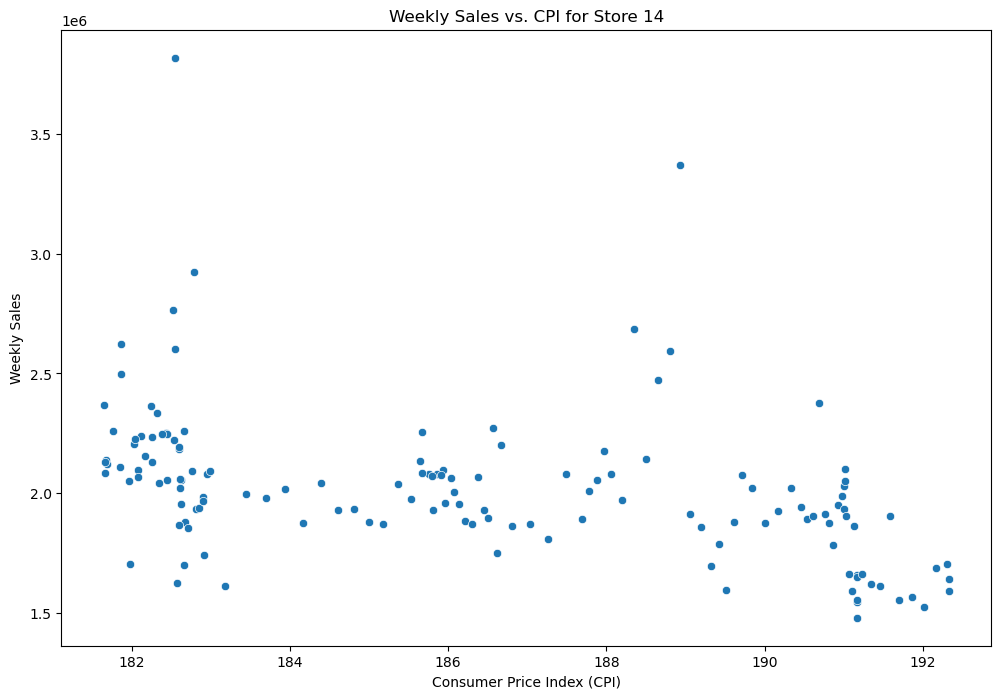

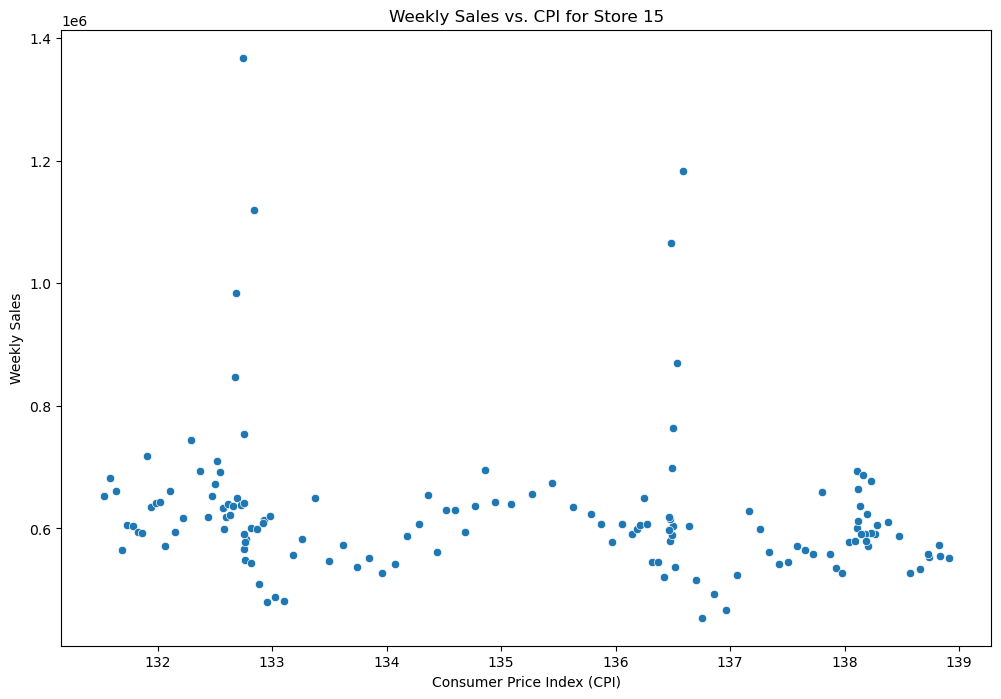

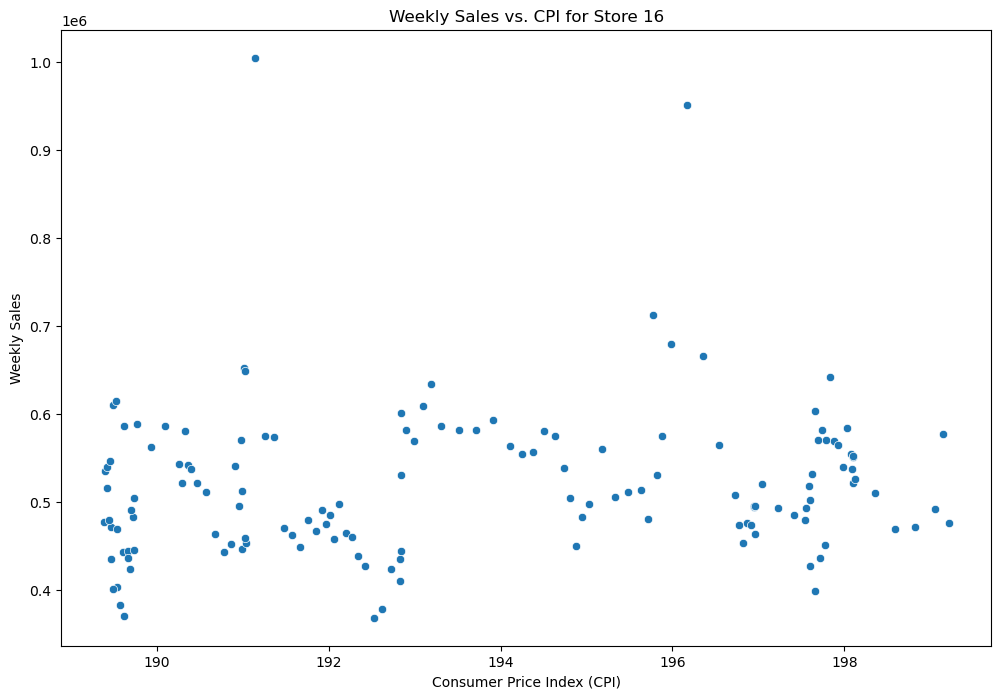

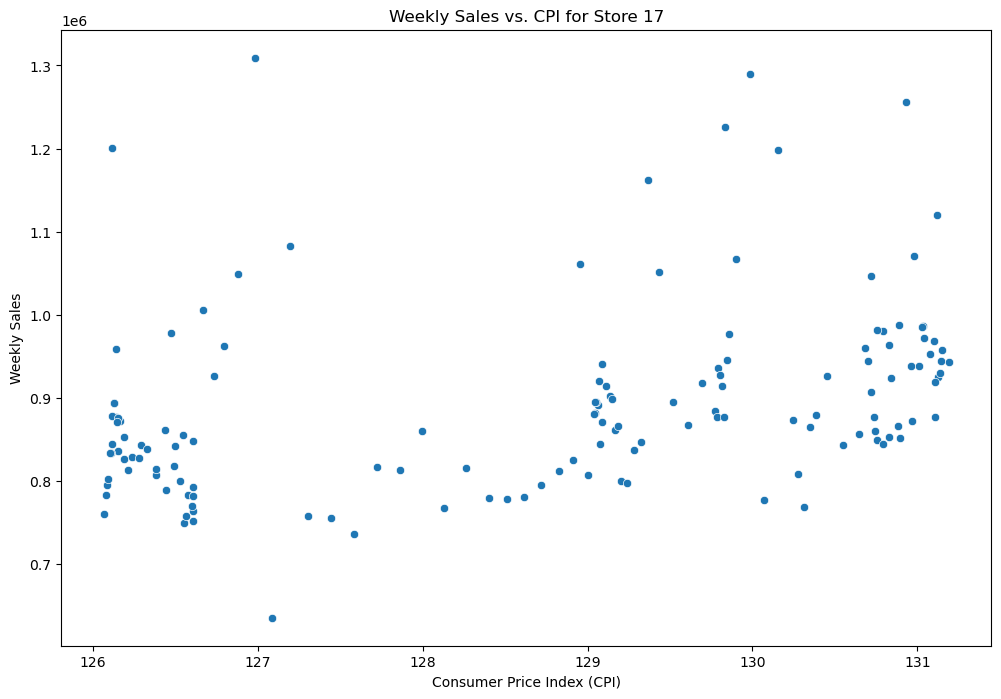

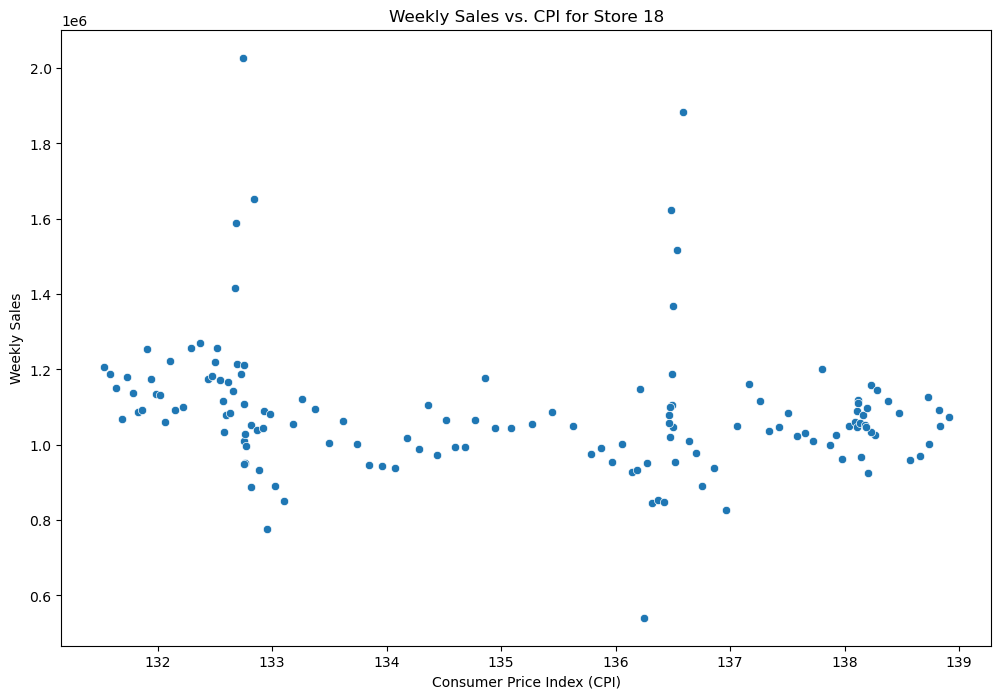

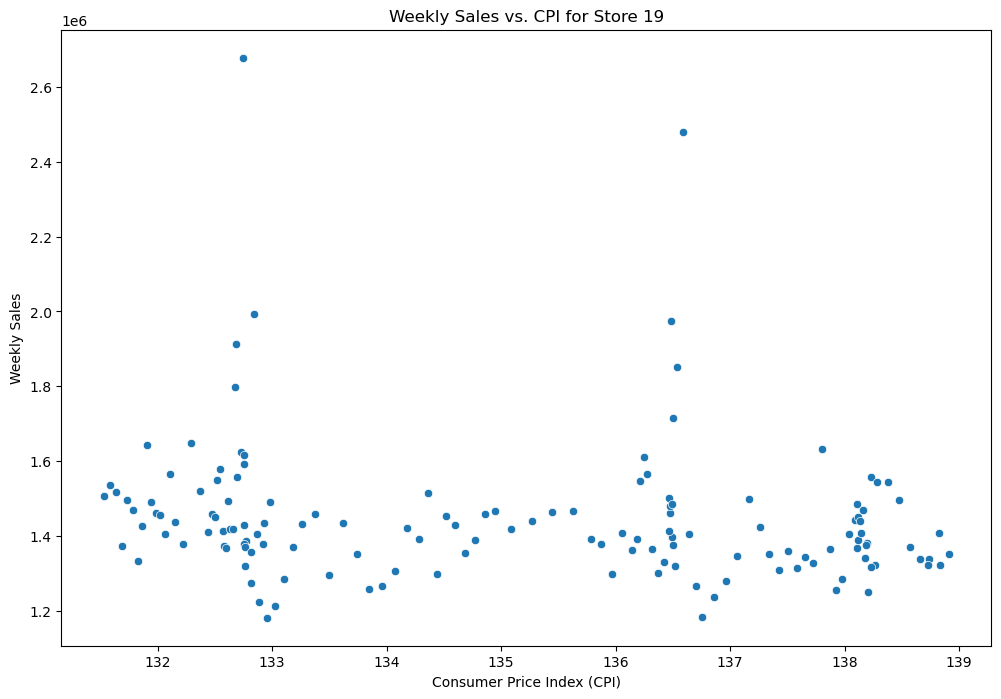

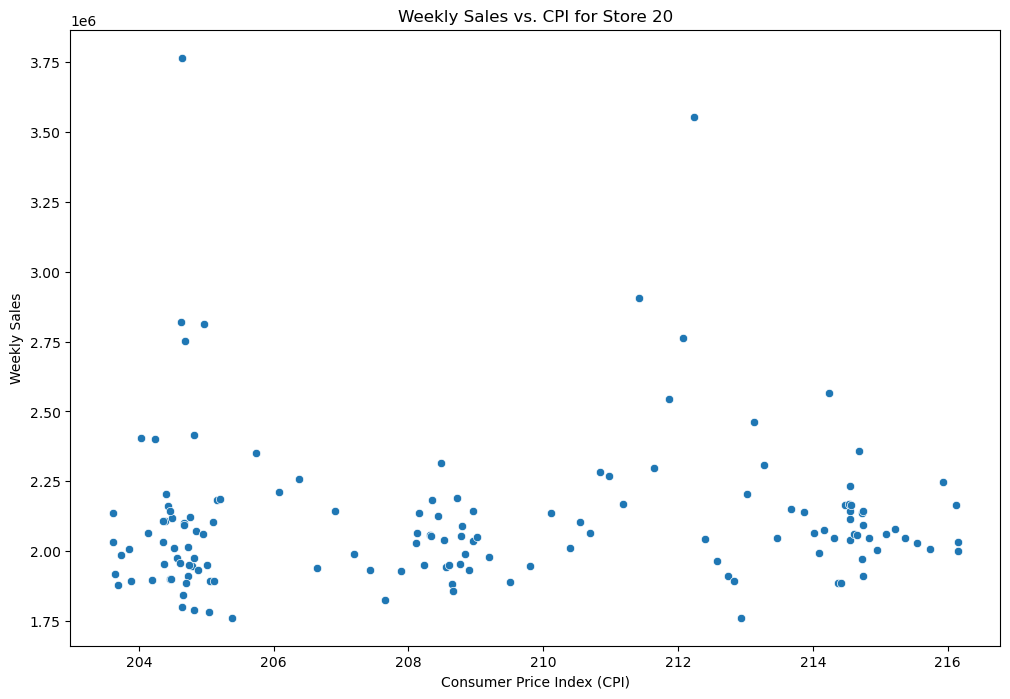

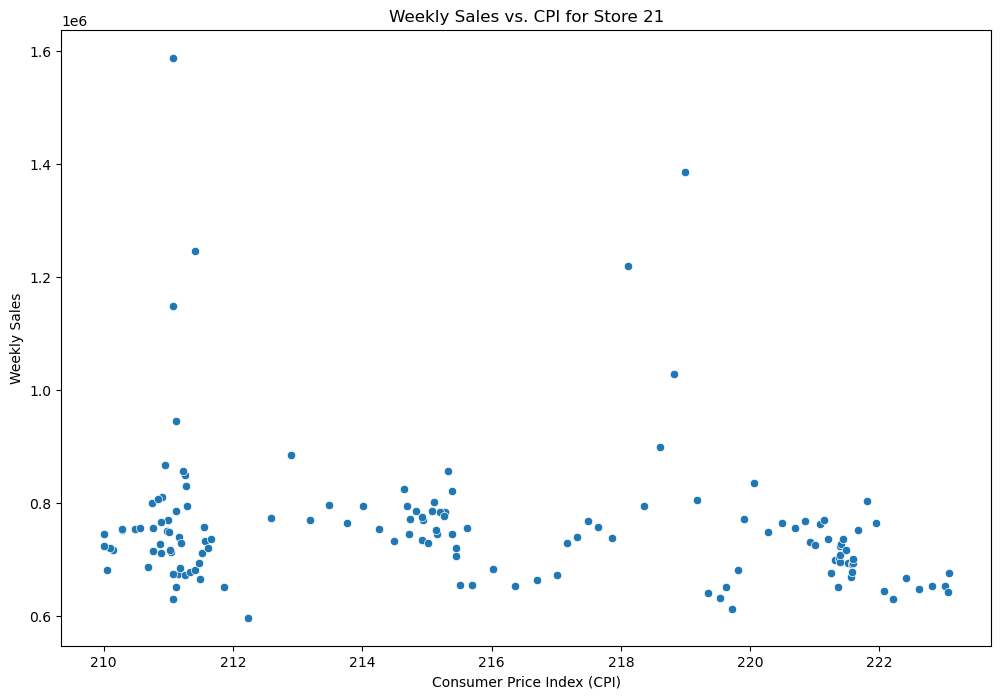

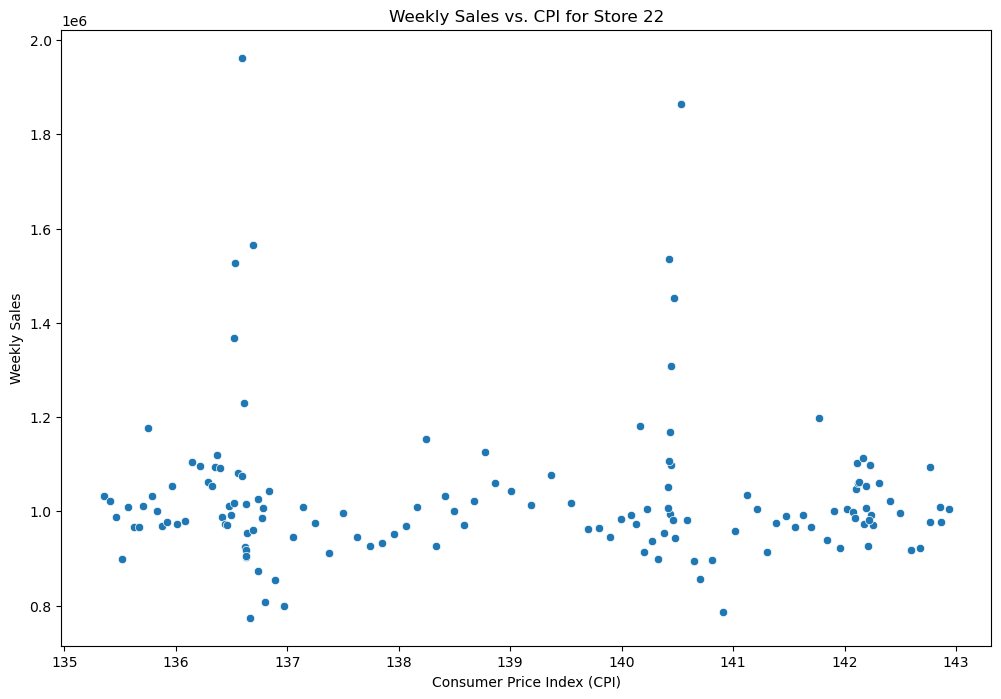

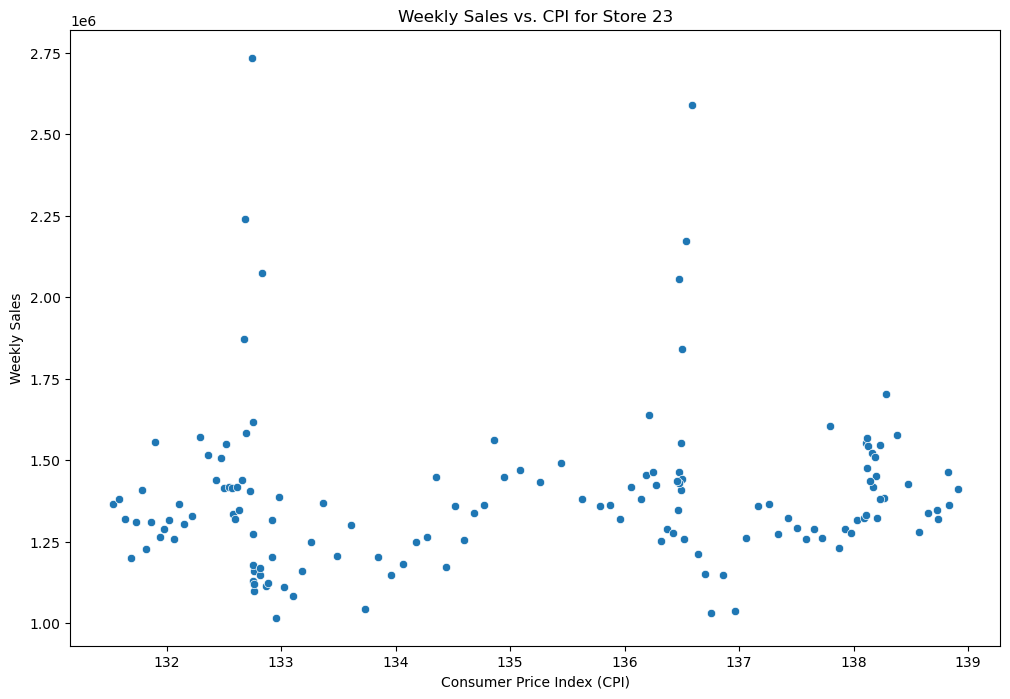

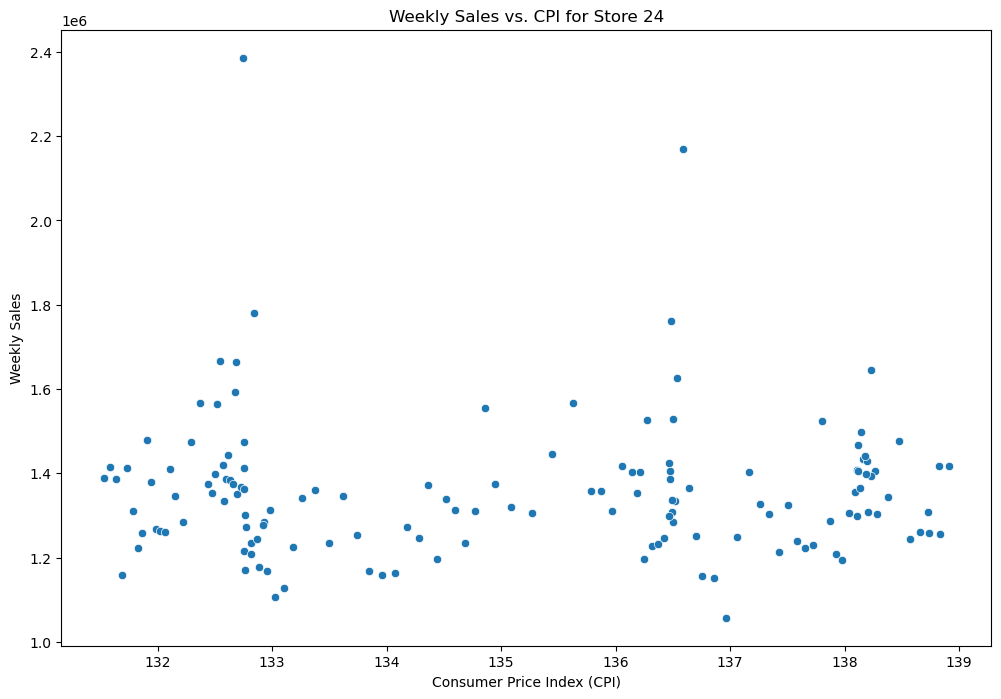

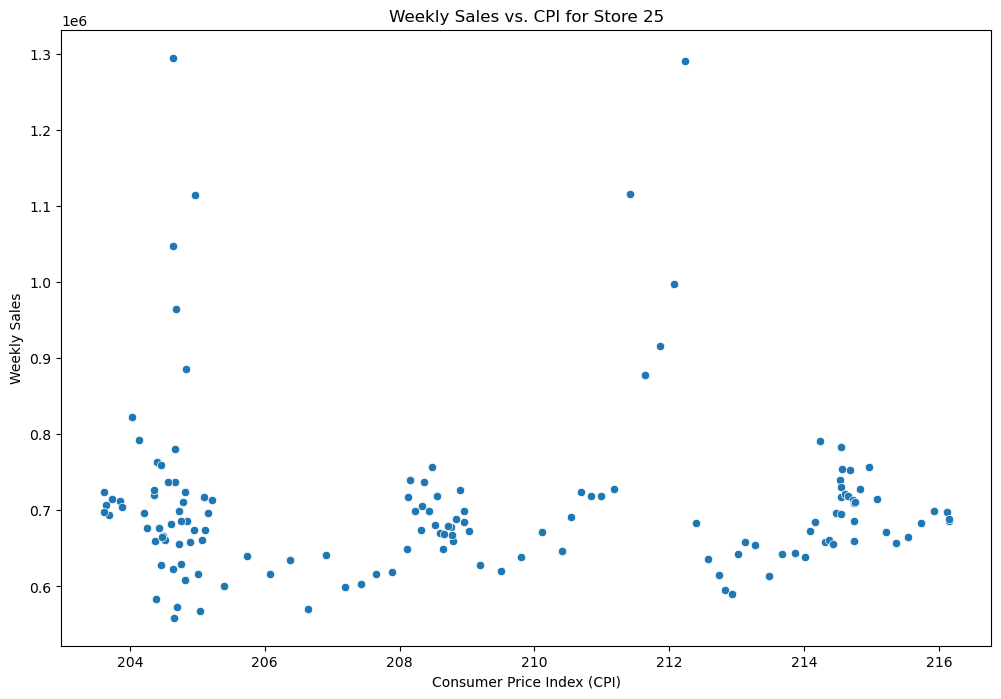

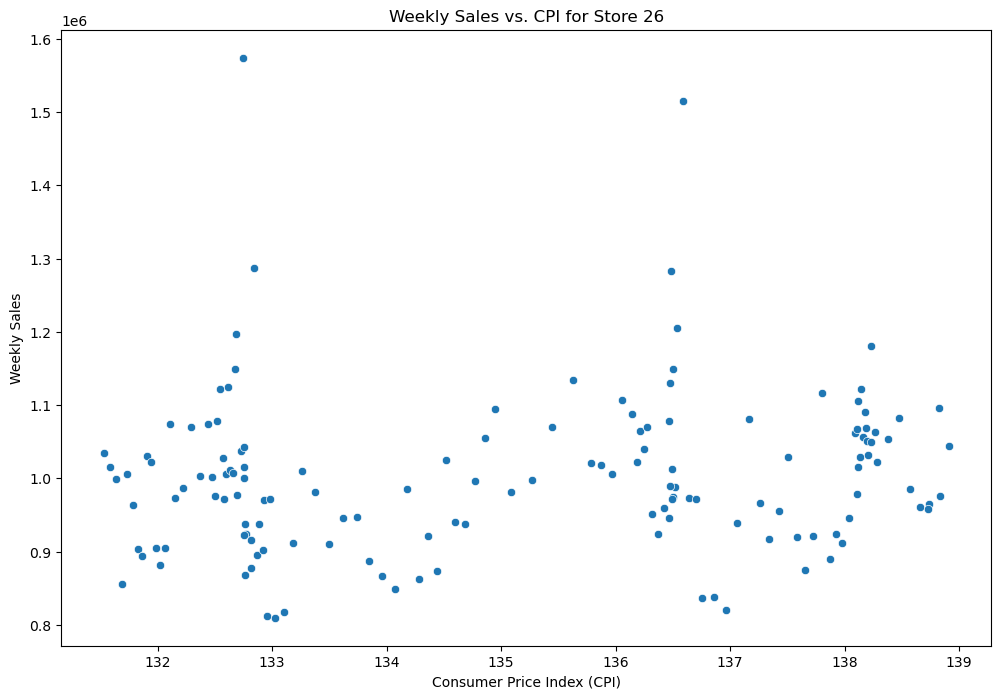

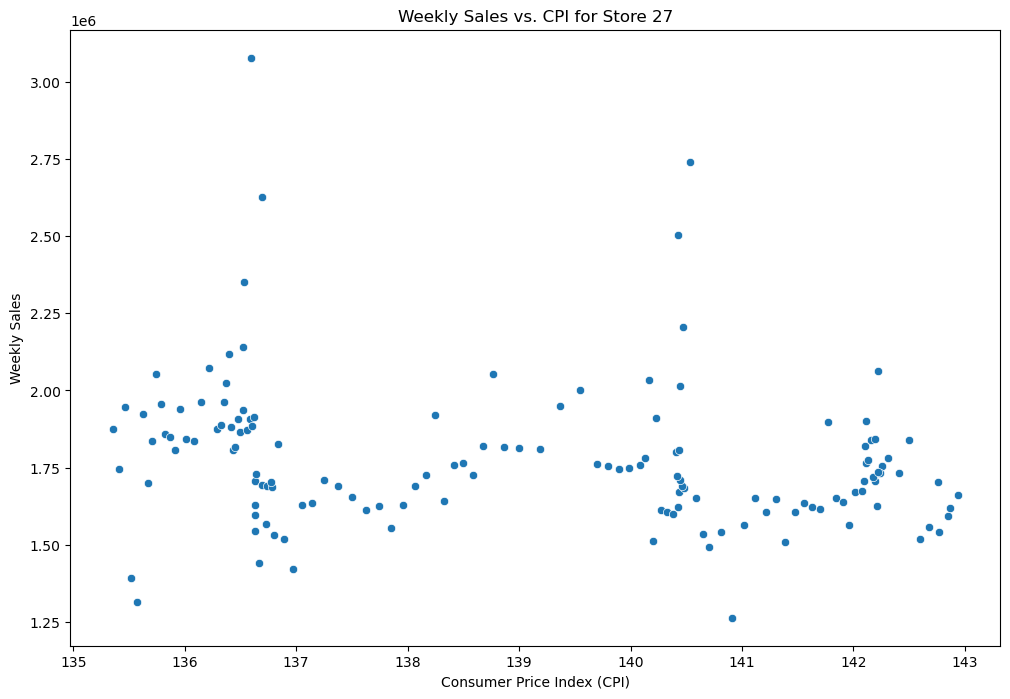

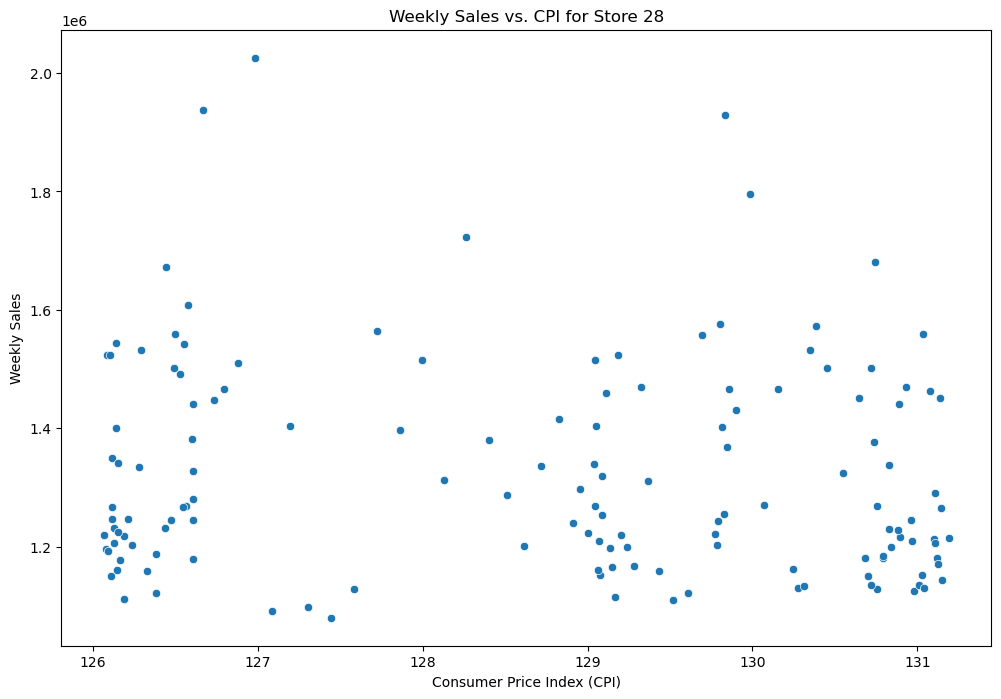

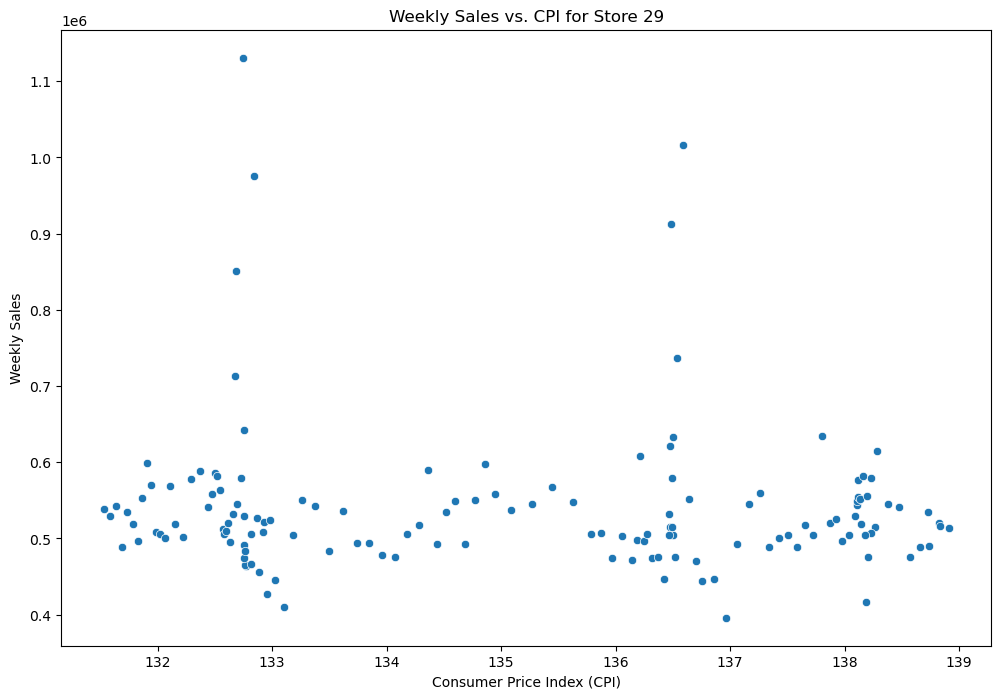

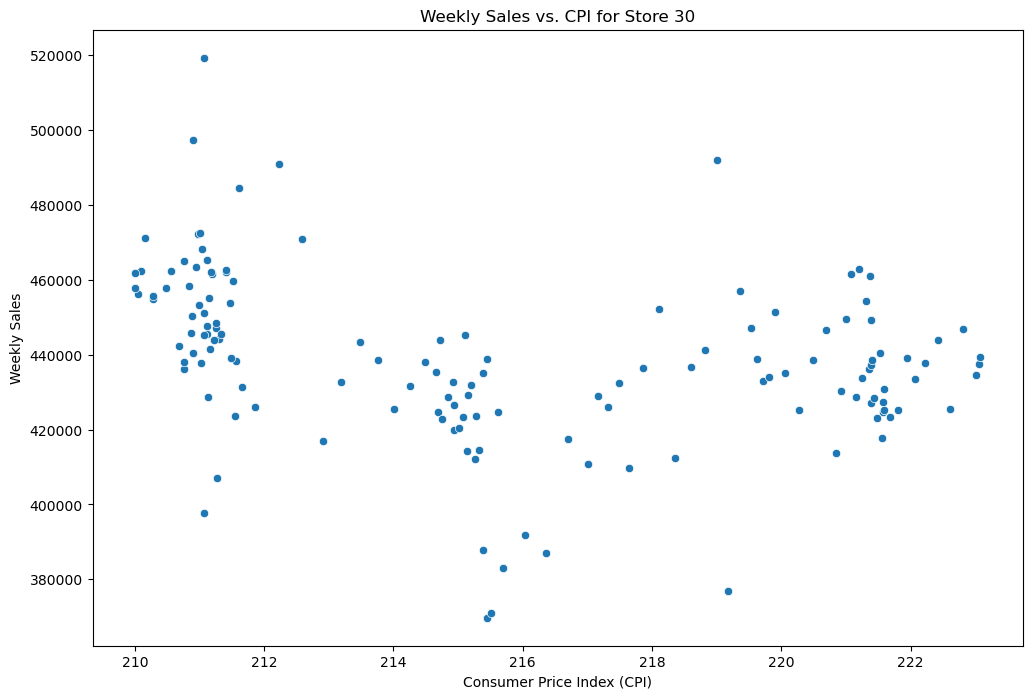

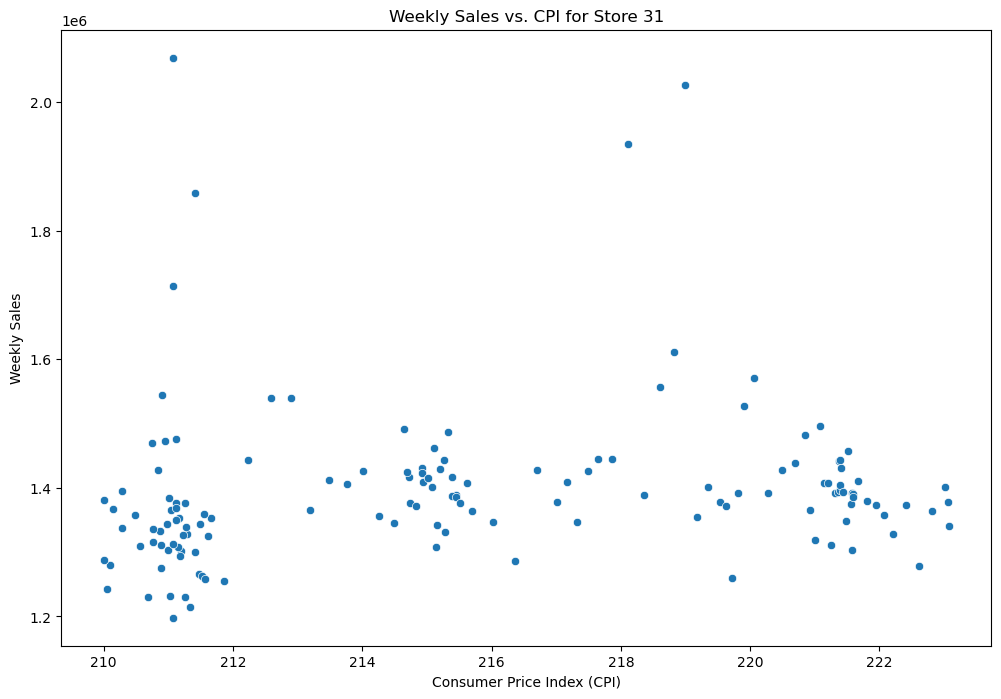

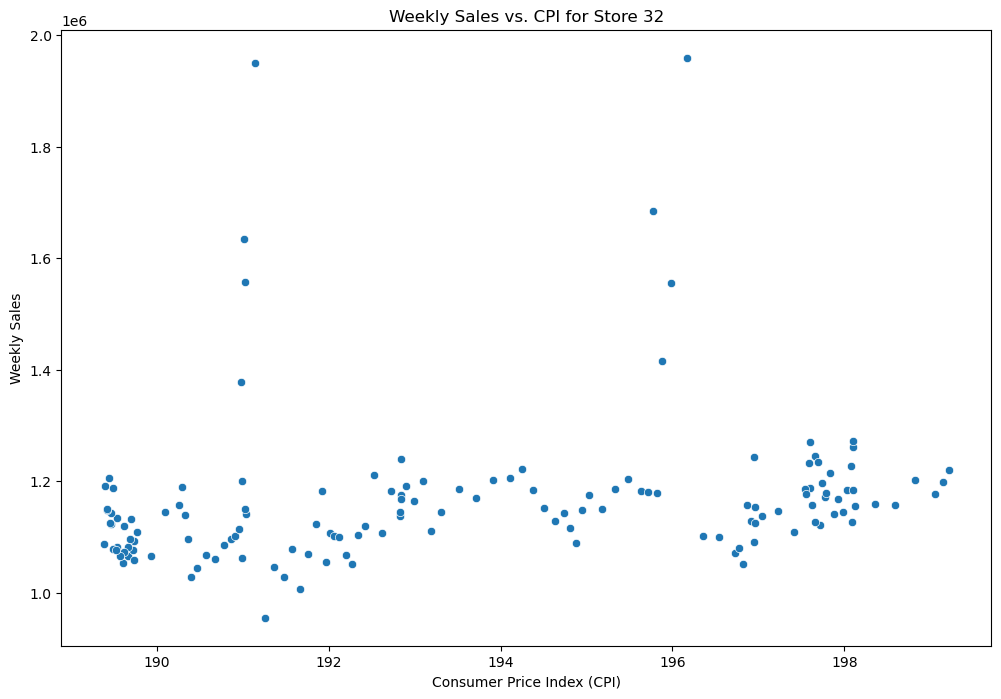

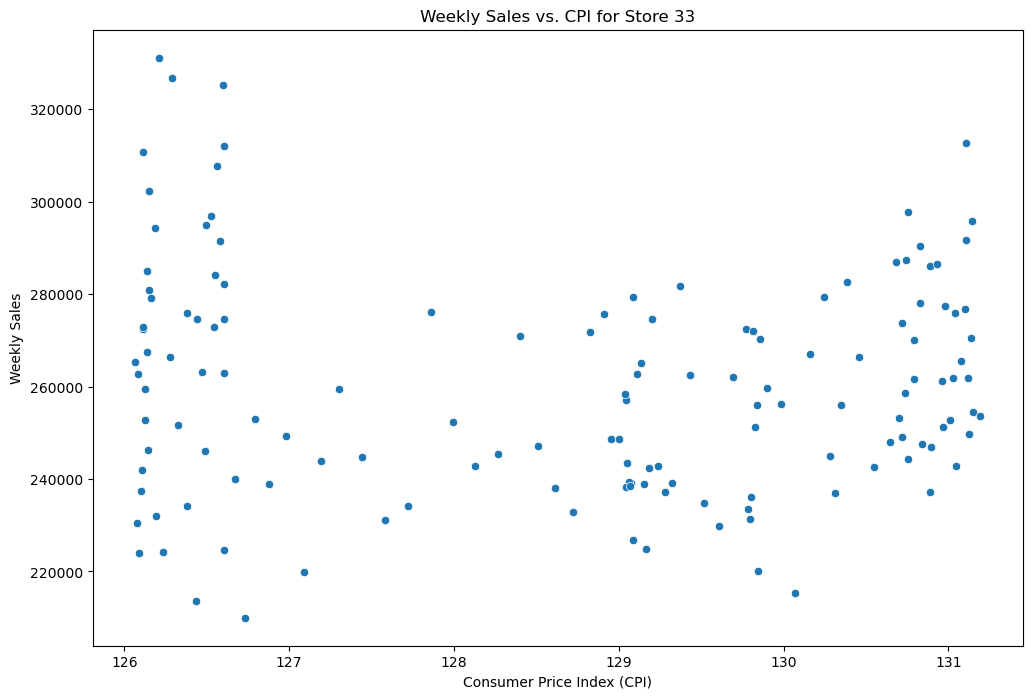

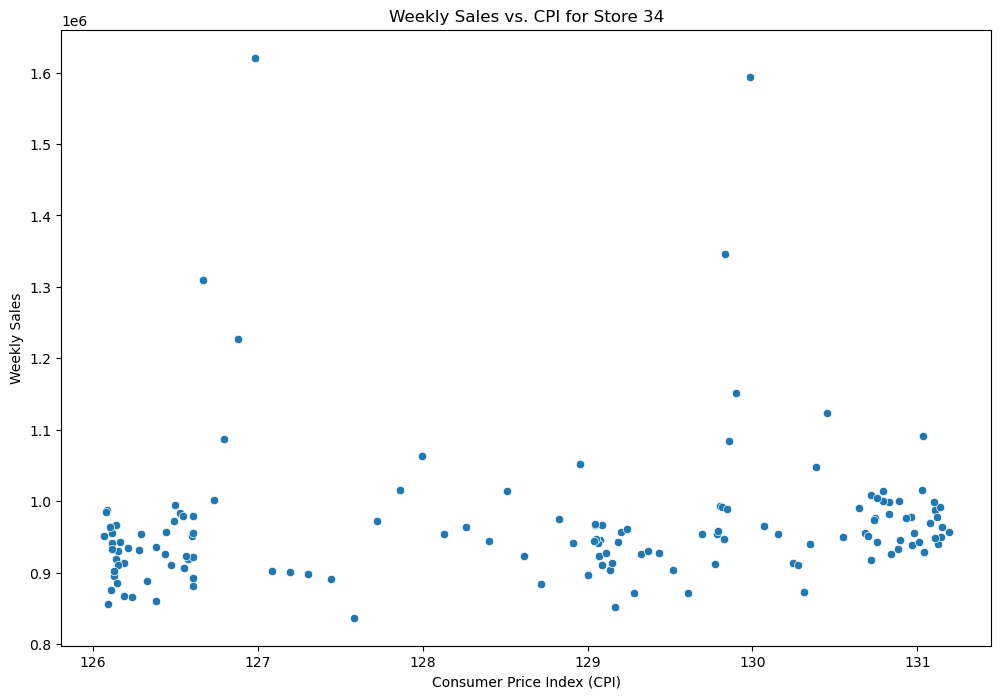

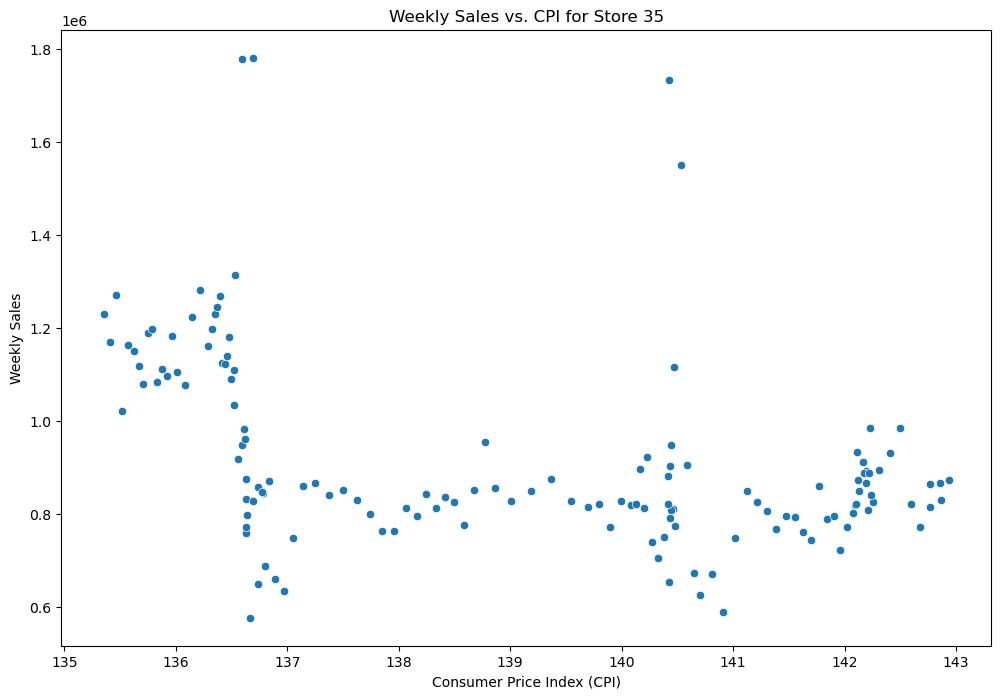

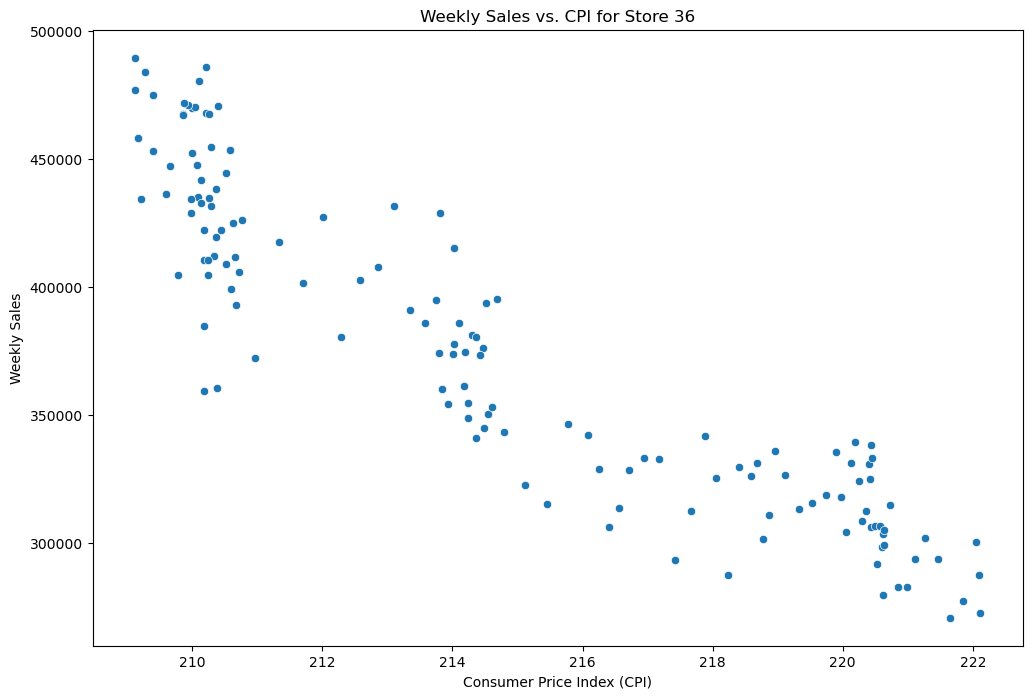

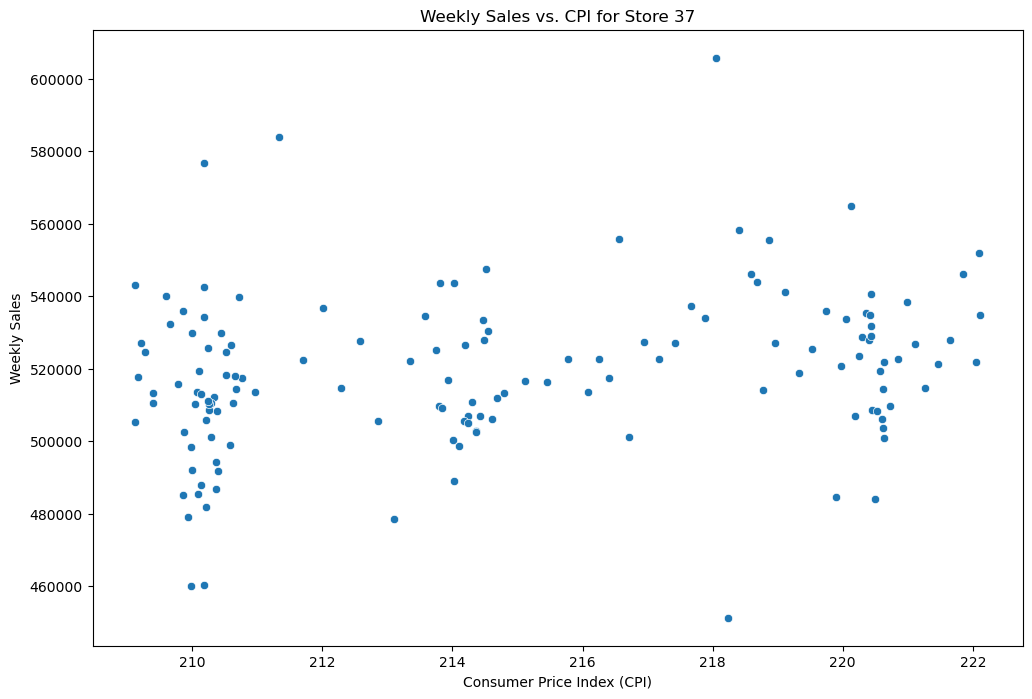

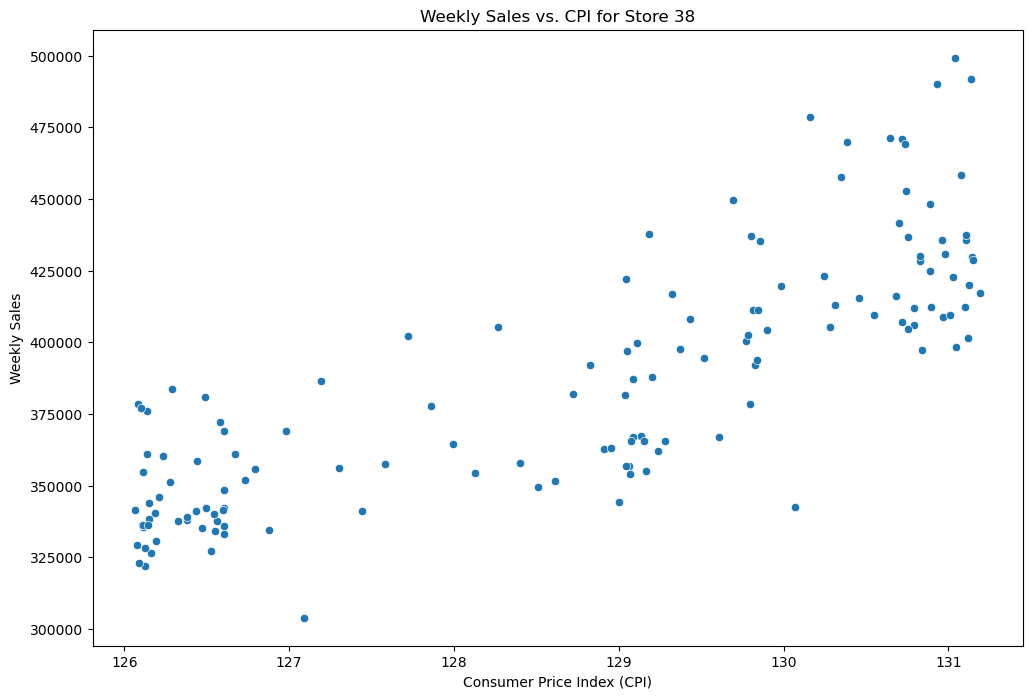

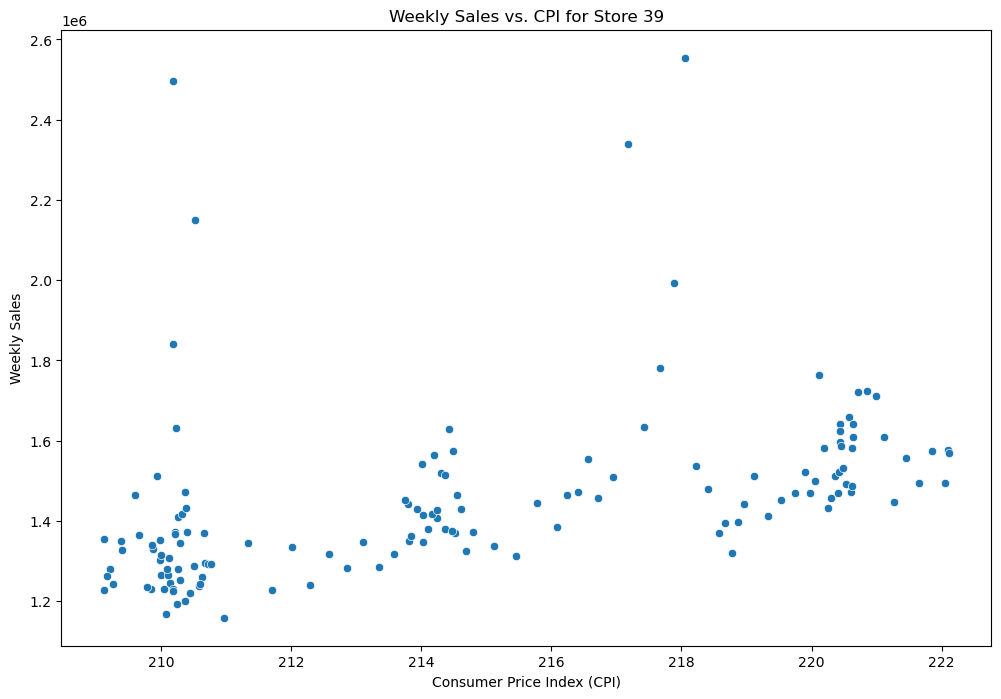

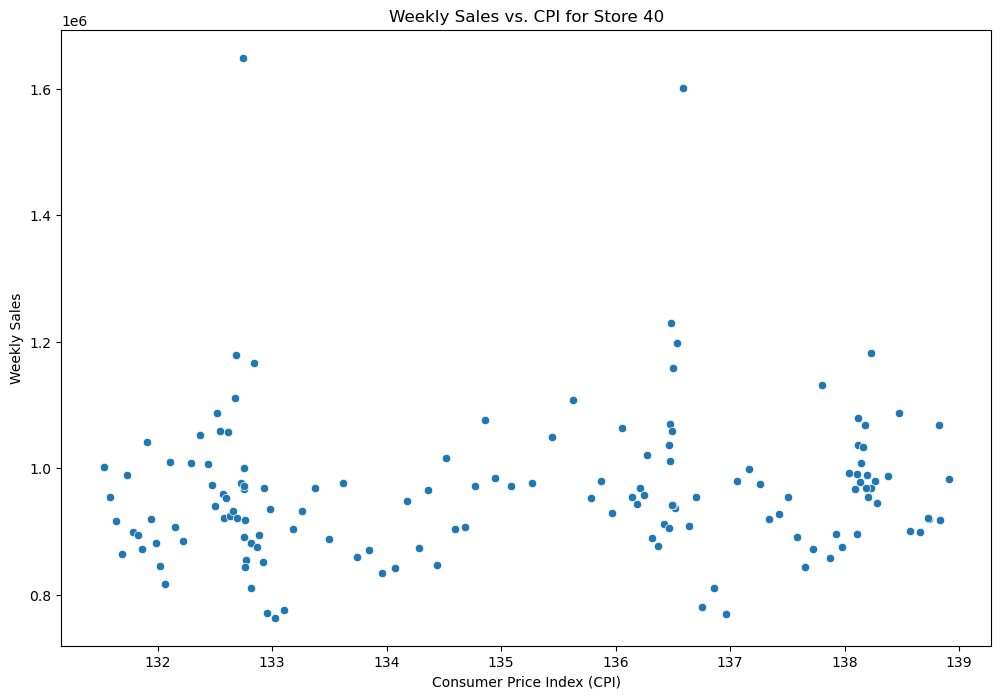

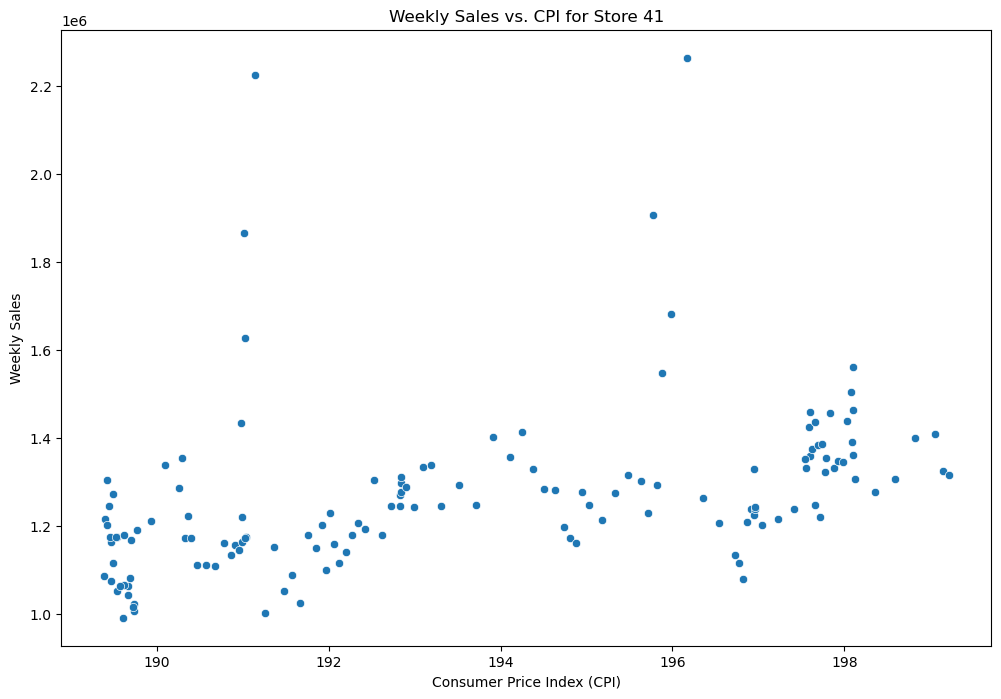

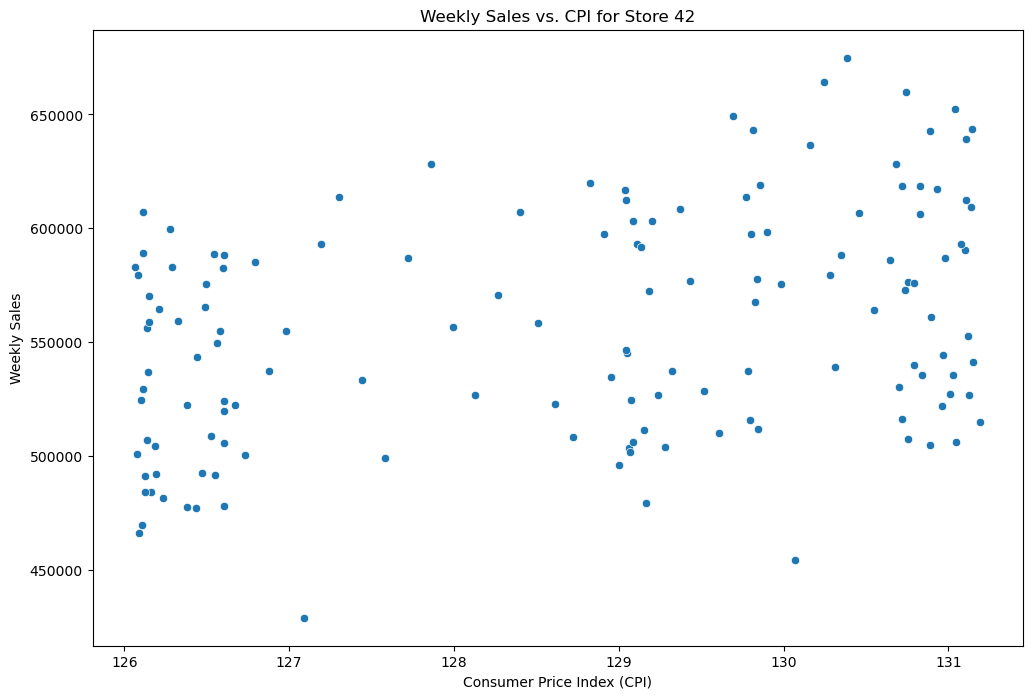

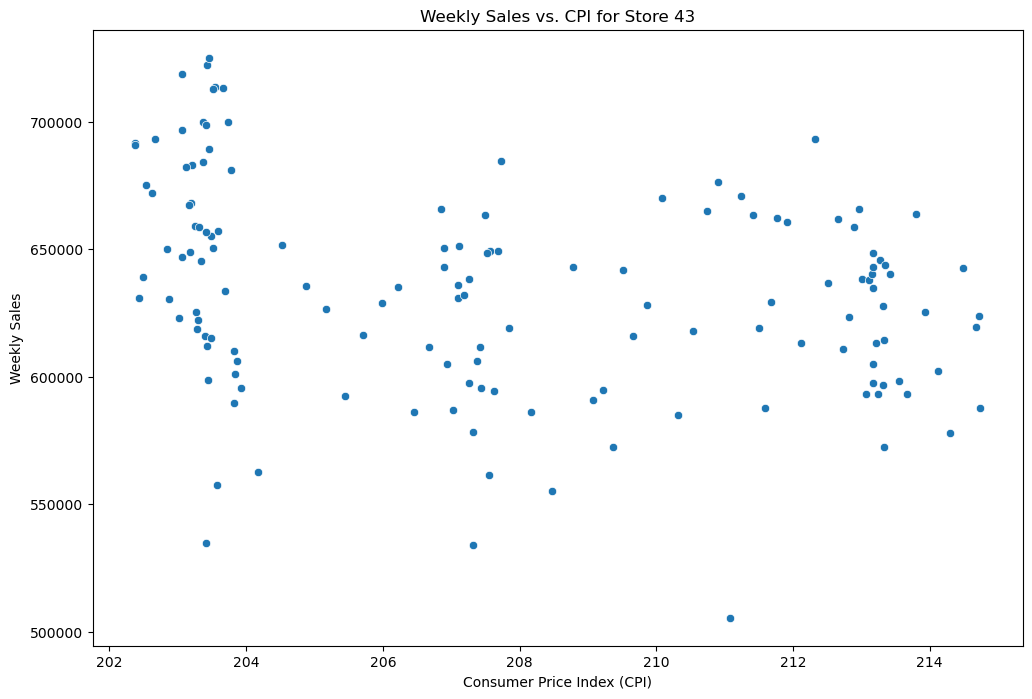

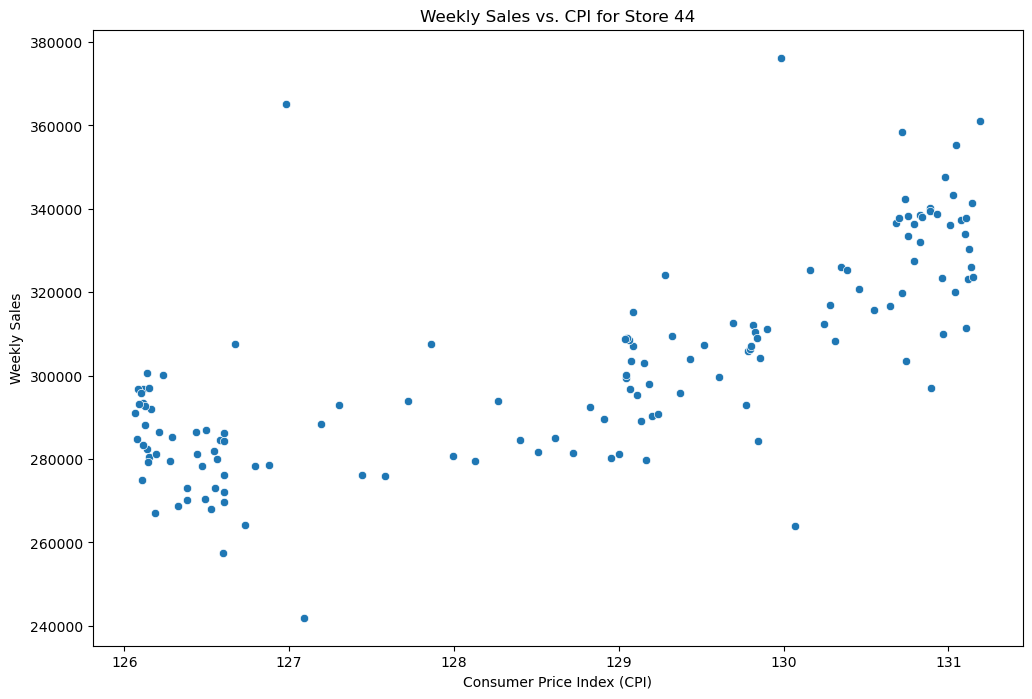

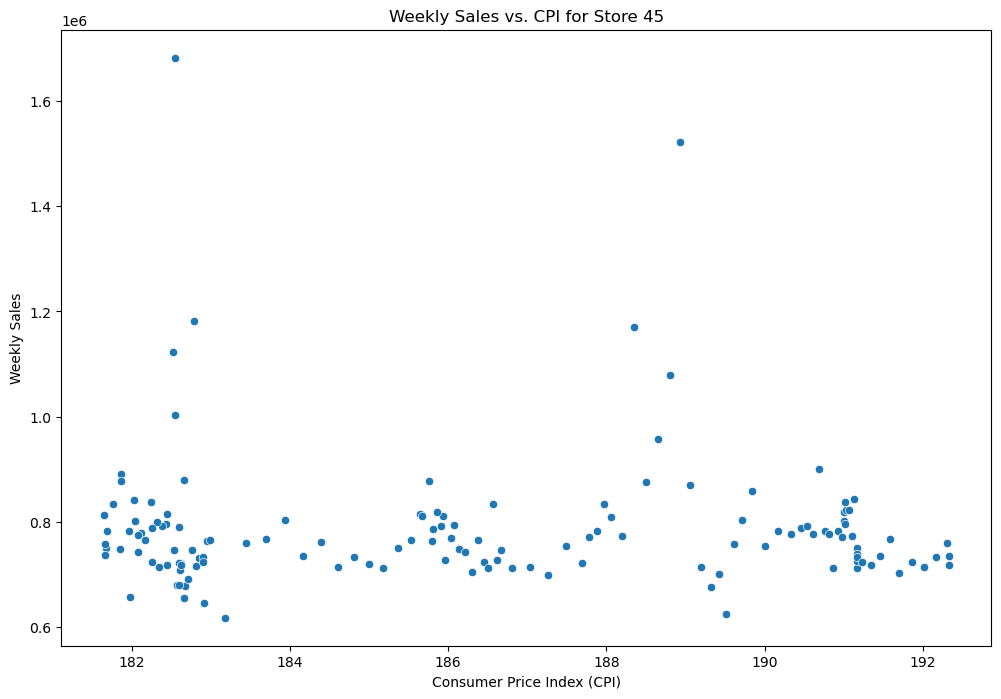

In [17]:
for store in df['Store'].unique():     
    store_data = df[df['Store'] == store]
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=store_data, x='CPI', y='Weekly_Sales')
    plt.title(f'Weekly Sales vs. CPI for Store {store}')
    plt.xlabel('Consumer Price Index (CPI)')
    plt.ylabel('Weekly Sales')
    plt.show()


##  Top performing stores according to the historical data.


In [20]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = store_sales.sort_values(by='Weekly_Sales',ascending=False)
top_stores.head(10)

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


## The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [27]:
# grouping store and weekly_sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()  

# sorting values
sorted_store = store_sales.sort_values(by='Weekly_Sales',ascending=False) 

#highest value
best_store = sorted_store.iloc[0] 

# worst value
worst_store = sorted_store.iloc[-1] 

# difference between highest and worst value
sales_difference = best_store['Weekly_Sales'] - worst_store['Weekly_Sales'] 

 # percentage of Weekly_sales
percentage_difference = (sales_difference/best_store['Weekly_Sales'])*100

# Printing the Result

print(f"Highest Performing Store : {best_store['Store']} with Sales: {best_store['Weekly_Sales']}")
print(f"Worst Performing Store :{worst_store['Store']} with Sales: {worst_store['Weekly_Sales']}")
print(f"Difference in Sales :{sales_difference}")
print(f"Percent Difference :{percentage_difference:.2f}%")

Highest Performing Store : 20.0 with Sales: 301397792.46
Worst Performing Store :33.0 with Sales: 37160221.96
Difference in Sales :264237570.49999997
Percent Difference :87.67%


##  Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [40]:
!pip install prophet  # installing prophet

09:31:10 - cmdstanpy - INFO - Chain [1] start processing
09:31:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vishal\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vishal\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


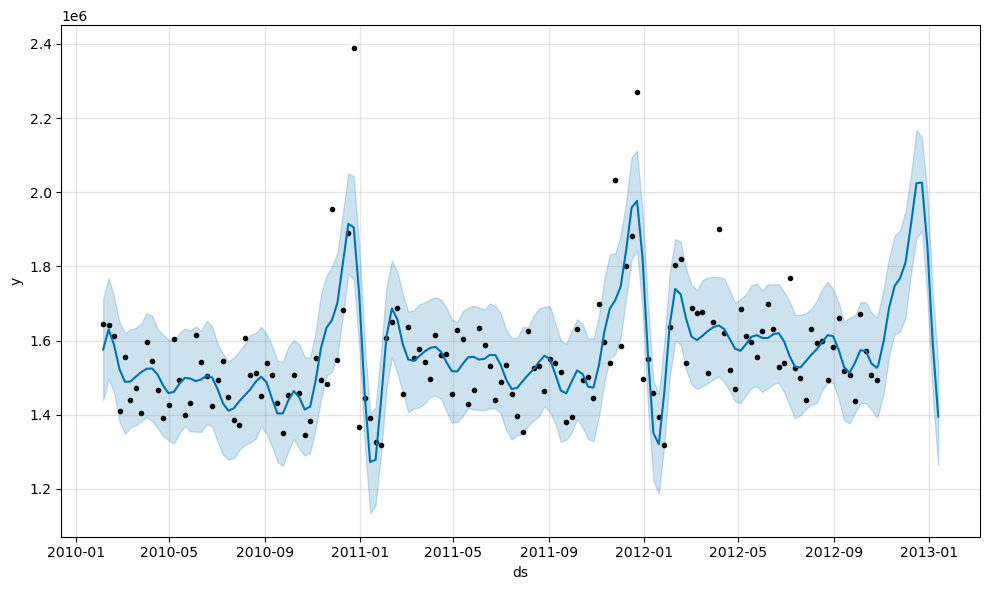

,ds,yhat
143,2012-10-28,1.533718e+06
144,2012-11-04,1.599962e+06
145,2012-11-11,1.690150e+06
146,2012-11-18,1.747218e+06
147,2012-11-25,1.768332e+06
148,2012-12-02,1.810907e+06
149,2012-12-09,1.913990e+06
150,2012-12-16,2.024511e+06
151,2012-12-23,2.026083e+06
152,2012-12-30,1.856230e+06


In [39]:
# Convertint the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Preparing data for Prophet 
prophet_data = df[df['Store'] == 1][['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initializing and fitting the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Forecasting the next 12 weeks
future = prophet_model.make_future_dataframe(periods=12, freq='W')  # Next 12 weeks
forecast = prophet_model.predict(future)

# Ploting the forecast
prophet_model.plot(forecast)
plt.show()

# Output 
forecast[['ds', 'yhat']].tail(12)
